<div style="
    border: 3px solid #0056b3;        /* Viền xanh đậm */
    border-radius: 10px;              /* Bo tròn góc */
    padding: 20px;
    margin: 20px 0;
    text-align: center;               /* Căn giữa toàn bộ nội dung */
    background-color: #e6f0ff;        /* Nền xanh nhạt */
    box-shadow: 5px 5px 10px #aaaaaa; /* Đổ bóng */
">
    <h1 style="color: #0056b3; margin-bottom: 5px;">
        ĐỒ ÁN CUỐI KÌ
    </h1>
    <h3 style="color: #333333; margin-top: 5px;">
        LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU
    </h3>
</div>

<div style="
    margin-top: 20px;
    margin-bottom: 10px;
    padding-bottom: 5px;
    border-bottom: 4px solid #007bff; /* Thanh ngang màu xanh */
">
    <h2 style="color: #007bff; margin: 0; padding: 0;">
        TỔNG QUAN
    </h2>
</div>

<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        Giới thiệu và Mục đích Đồ án
    </h3>
</div>

Trong đồ án cuối kì môn *Lập trình cho Khoa học Dữ liệu*, bộ dữ liệu **Online Shoppers Purchasing Intention Dataset** được chọn phân tích để tìm hiểu hành vi của người dùng trên các website thương mại điện tử.

Mục tiêu của đồ án là phân tích và dự đoán khả năng người dùng thực hiện mua hàng. Nhóm sẽ tiến hành các bước như tiền xử lý dữ liệu, phân tích khám phá (EDA), trực quan hóa, xây dựng mô hình dự đoán và rút ra những yếu tố quan trọng ảnh hưởng đến quyết định mua hàng.

<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        Thành viên nhóm
    </h3>
</div>

<div style="
    text-align: center;         /* Đảm bảo toàn bộ bảng được căn giữa */
    margin: 20px auto;          /* Canh lề trên/dưới và tự động canh giữa theo chiều ngang */
    width: 80%;                 /* Đặt độ rộng của bảng (tùy chỉnh nếu cần) */
">
    <table style="
        width: 100%;
        border-collapse: collapse; /* Gộp các đường viền */
        border-radius: 8px;        /* Bo tròn góc cho bảng */
        overflow: hidden;          /* Quan trọng để bo tròn góc hoạt động */
        box-shadow: 0 4px 8px rgba(0,0,0,0.1); /* Đổ bóng nhẹ nhàng */
    ">
        <thead style="background-color: #3498db; color: white;">
            <tr>
                <th style="padding: 10px; width: 10%;">STT</th>
                <th style="padding: 10px; width: 30%;">MSSV</th>
                <th style="padding: 10px; width: 60%;">Họ và tên</th>
            </tr>
        </thead>
        <tbody>
            <tr style="background-color: #f8f9fa;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">1</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">23127361</td>
                <td style="padding: 10px; border: 1px solid #dee2e6; text-align: left;">&nbsp; Thạch Ngọc Hân</td>
            </tr>
            <tr style="background-color: #e9ecef;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">2</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">23127466</td>
                <td style="padding: 10px; border: 1px solid #dee2e6; text-align: left;">&nbsp; Phan Như Quỳnh</td>
            </tr>
            <tr style="background-color: #f8f9fa;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">3</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">23127488</td>
                <td style="padding: 10px; border: 1px solid #dee2e6; text-align: left;">&nbsp; Lê Thị Minh Thư</td>
            </tr>
        </tbody>
    </table>
</div>

<div style="
    margin-top: 20px;
    margin-bottom: 10px;
    padding-bottom: 5px;
    border-bottom: 4px solid #007bff; /* Thanh ngang màu xanh */
">
    <h2 style="color: #007bff; margin: 0; padding: 0;">
        A. THU THẬP DỮ LIỆU
    </h2>
</div>

<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        I. Giới thiệu và thông tin tập dữ liệu
    </h3>
</div>

<div style="margin: 16px 0 10px 0;">
  <h4 style="
    margin: 0;
    font-weight: 600;
    display: inline-block;
    padding-bottom: 4px;
    border-bottom: 2px solid #e0e0e0;
  ">
    Chủ đề và Mục tiêu
  </h4>
</div>

Bộ dữ liệu này thuộc lĩnh vực **_Phân tích hành vi người tiêu dùng trong Thương mại điện tử_**.

<div style="
    border: 1px solid #0056b3;
    border-radius: 5px;
    padding: 10px;
    margin: 15px 0;
    background-color: #e6f0ff;
    text-align: center;
">
    <strong style="color: #0056b3; font-size: 1.2em;">
        CHỦ ĐỀ CHÍNH: Dự đoán ý định mua sắm trực tuyến (Online Shoppers Purchasing Intention Prediction)
    </strong>
</div>

Dữ liệu không chỉ ghi lại quá khứ (khách đã làm gì) mà còn được thiết kế để phục vụ bài toán dự báo tương lai (khách có khả năng mua hàng hay không dựa trên các hành động đó).

> **Bài toán Phân loại:** Đây là một bài toán phân loại (Classification) nhị phân. Thuộc tính **`Revenue`** (Doanh thu) đóng vai trò là **nhãn lớp (class label)** để xác định xem một phiên truy cập có kết thúc bằng giao dịch mua hàng hay không.

<div style="margin: 16px 0 10px 0;">
  <h4 style="
    margin: 0;
    font-weight: 600;
    display: inline-block;
    padding-bottom: 4px;
    border-bottom: 2px solid #e0e0e0;
  ">
    Mô tả chi tiết dữ liệu
  </h4>
</div>

- **Domain:** Dữ liệu thuộc lĩnh vực **_Thương mại điện tử (E-commerce)_** và **_Phân tích web (Web Analytics)_**. Nó kết hợp các yếu tố kỹ thuật của khoa học dữ liệu với tâm lý học hành vi người tiêu dùng.

- **Cấu trúc dữ liệu:** Bộ dữ liệu bao gồm 18 thuộc tính, bao quát toàn diện các khía cạnh của một phiên truy cập.

- **Phenomenon:** Dữ liệu mô tả hiện tượng tương tác của người dùng trên website. Nó phân loại các hành động của người dùng thành các nhóm hành vi khác nhau như:

    - **Mức độ tương tác với nội dung của các trang:**
        - **Administrative (Quản trị):** Tài khoản, cài đặt, đăng nhập.
        - **Informational (Thông tin):** Tin tức, địa chỉ, chính sách bảo hành.
        - **ProductRelated (Sản phẩm):** Trang chi tiết sản phẩm, danh mục hàng hóa.
    > Dữ liệu đo lường cả tần suất **_(số trang đã xem)_** và cường độ **_(tổng thời gian xem - Duration)_** cho từng loại trang này. Điều này giúp phân biệt giữa một người "xem lướt" và một người "nghiên cứu kỹ". Các giá trị này được cập nhật theo thời gian thực dựa trên URL khi người dùng di chuyển giữa các trang.

    - **Chất lượng phiên truy cập qua các chỉ số Google Analytics:**
        - **Bounce Rate (Tỷ lệ thoát):** Tỷ lệ khách vào web và rời đi ngay mà không tương tác thêm. Chỉ số này **_phản ánh độ hấp dẫn của trang đích_**.
        - **Exit Rate (Tỷ lệ thoát trang)**: Tỷ lệ khách rời khỏi website từ một trang cụ thể.
        - **Page Values (Giá trị trang):** Một chỉ số quan trọng đo lường giá trị trung bình của một trang trong việc đóng góp vào việc hoàn thành giao dịch. Đây thường là **_chỉ báo mạnh nhất về ý định mua hàng_**.

    - **Yếu tố thời gian và thời điểm:**
        - **Month:** Tháng trong năm (để thấy tính mùa vụ).
        - **Weekend:** Có phải cuối tuần không.
        - **SpecialDay:** Mức độ gần gũi của ngày truy cập với một ngày lễ đặc biệt hoặc sự kiện mua sắm (ví dụ: gần Valentine, Black Friday). Chỉ số này đo lường tác động của **_tâm lý săn sale hoặc mua quà tặng_**.

    - **Bối cảnh thực tế:**
    Dữ liệu này là bản sao kỹ thuật số của một phiên mua sắm thực tế tại một cửa hàng trực tuyến. Nó đại diện cho kịch bản sau:
        - **Khách hàng:** Một người dùng (có thể là khách mới hoặc khách quay lại) truy cập vào website thông qua một thiết bị, trình duyệt và nguồn lưu lượng cụ thể (Traffic Type).
        - **Hành động:** Họ bắt đầu hành trình **_dạo quanh_** cửa hàng ảo: xem thông tin tài khoản, đọc tin tức khuyến mãi, và quan trọng nhất là xem các sản phẩm. Hệ thống theo dõi từng bước chân của họ: **_họ dừng lại ở trang sản phẩm bao lâu? Họ có rời đi ngay khi vừa vào trang chủ không?_**
        - **Thời điểm:** Hành vi của họ bị chi phối bởi thời gian thực tế. **_Ví dụ:_** Vào gần ngày Valentine, hành vi tìm kiếm quà tặng sẽ khác ngày thường; hoặc hành vi mua sắm vào cuối tuần (Weekend) có thể rảnh rỗi và chi tiết hơn trong tuần.
        - **Kết quả:** Tất cả các yếu tố trên (xem nhiều sản phẩm, xem trang có giá trị cao, truy cập vào dịp lễ) hội tụ lại để trả lời câu hỏi cuối cùng của doanh nghiệp: **_Liệu khách hàng này có thực hiện giao dịch hay không?_**

<div style="margin: 16px 0 10px 0;">
  <h4 style="
    margin: 0;
    font-weight: 600;
    display: inline-block;
    padding-bottom: 4px;
    border-bottom: 2px solid #e0e0e0;
  ">
    Nguồn dữ liệu và nền tảng
  </h4>
</div>

- **Nền tảng:** UCI Machine Learning Repository.
- **URL đầy đủ:** https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

<div style="margin: 16px 0 10px 0;">
  <h4 style="
    margin: 0;
    font-weight: 600;
    display: inline-block;
    padding-bottom: 4px;
    border-bottom: 2px solid #e0e0e0;
  ">
    Tác giả và Tổ chức
  </h4>
</div>

- **Dữ liệu được tạo ra và đóng góp bởi các nhà nghiên cứu:**
    - C. Okan Sakar
    - Yomi Kastro

<div style="margin: 16px 0 10px 0;">
  <h4 style="
    margin: 0;
    font-weight: 600;
    display: inline-block;
    padding-bottom: 4px;
    border-bottom: 2px solid #e0e0e0;
  ">
    Ngày công bố
  </h4>
</div>

- **Năm đóng góp:** Bộ dữ liệu được tặng cho kho lưu trữ UCI vào năm 2018.
- **Ngày thu thập:** 01/12/2025

<div style="margin: 16px 0 10px 0;">
  <h4 style="
    margin: 0;
    font-weight: 600;
    display: inline-block;
    padding-bottom: 4px;
    border-bottom: 2px solid #e0e0e0;
  ">
    Giấy phép và quyền sử dụng
  </h4>
</div>


* **Loại giấy phép (License Type):**
    * Dữ liệu được phát hành dưới giấy phép **CC BY 4.0 (Creative Commons Attribution 4.0 International)**.
* **Quyền sử dụng cho mục đích giáo dục:**
    * **Có.** Giấy phép này cho phép tự do chia sẻ, sửa đổi và sử dụng dữ liệu cho mọi mục đích (bao gồm giáo dục và thương mại).
* **Các hạn chế và yêu cầu ghi nhận (Restrictions & Attribution):**
    * **Yêu cầu ghi nhận:** Bắt buộc phải trích dẫn nguồn gốc tác giả khi sử dụng.
    * **Trích dẫn chuẩn:**
      > Sakar, C. & Kastro, Y. (2018). Online Shoppers Purchasing Intention Dataset [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5F88Q.
    * **Hạn chế:** Không có hạn chế pháp lý đặc biệt nào khác, miễn là tuân thủ việc ghi nhận nguồn.

<div style="margin: 16px 0 10px 0;">
  <h4 style="
    margin: 0;
    font-weight: 600;
    display: inline-block;
    padding-bottom: 4px;
    border-bottom: 2px solid #e0e0e0;
  ">
    Phương pháp thu thập dữ liệu
  </h4>
</div>

* **Phương pháp thu thập (Collection Method):**
    * Dữ liệu được thu thập thụ động thông qua việc theo dõi hành vi người dùng trên website thương mại điện tử.
    * **Phân tích URL:** Các tính năng hành vi (như *Administrative, Informational, ProductRelated*) được trích xuất từ thông tin URL của các trang mà người dùng truy cập.
    * **Google Analytics:** Các chỉ số hiệu suất web (như *Bounce Rate, Exit Rate, Page Value*) được lấy từ hệ thống **Google Analytics**.
    * **Thời gian thực:** Dữ liệu được cập nhật theo thời gian thực khi người dùng thực hiện hành động (ví dụ: chuyển trang).

* **Đối tượng và Phạm vi lấy mẫu (Target Population & Sampling):**
    * **Quy mô mẫu:** Tổng cộng 12,330 phiên truy cập (sessions).
    * **Chiến lược lấy mẫu:** Mỗi phiên truy cập trong bộ dữ liệu thuộc về một người dùng khác nhau (different user). Không có người dùng nào xuất hiện 2 lần.
    * **Khoảng thời gian (Time Period):** Dữ liệu được thu thập trong vòng **1 năm**.

* **Các hạn chế và sai số (Limitations & Biases):**
    * **Mất cân bằng dữ liệu (Class Imbalance):** Bộ dữ liệu có sự chênh lệch lớn giữa hai nhãn: 84.5% (10,422) là các phiên không mua hàng (Negative) và chỉ 15.5% (1,908) là các phiên có hành vi mua hàng (Positive). 
    * **Nguồn dữ liệu (Source Bias):** Dữ liệu đến từ một trang thương mại điện tử cụ thể, nên các hành vi có thể mang đặc thù của giao diện hoặc loại sản phẩm của trang web đó (ví dụ: hành vi mua đồ điện tử sẽ khác với mua quần áo).
    * **Tính năng "Ngày đặc biệt" (Special Day):** Biến số 'Special Day' được tính toán dựa trên logic giao hàng và lịch ngày lễ cụ thể của nơi thu thập dữ liệu gốc. Khi áp dụng mô hình này sang thị trường khác, cần phải tính toán lại biến số này dựa trên lịch ngày lễ và thói quen mua sắm của địa phương đó mới đảm bảo chính xác.

<div style="margin: 16px 0 10px 0;">
  <h4 style="
    margin: 0;
    font-weight: 600;
    display: inline-block;
    padding-bottom: 4px;
    border-bottom: 2px solid #e0e0e0;
  ">
    Lý do chọn dataset
  </h4>
</div>

Hiện nay, việc mua sắm online ngày càng trở nên phổ biến và đóng vai trò quan trọng trong hoạt động thương mại điện tử. Điều này khiến cho việc hiểu rõ hành vi của người dùng trên các nền tảng trực tuyến trở thành nhu cầu thiết yếu đối với nhiều doanh nghiệp. Bộ dữ liệu mà nhóm lựa chọn phản ánh chi tiết hành vi mua sắm trực tuyến của người dùng, bao gồm số trang đã xem, thời gian truy cập, nguồn truy cập, thiết bị sử dụng và kết quả có dẫn đến giao dịch hay không. Do đó, việc phân tích và đánh giá bộ dữ liệu này có thể giúp nhận diện các yếu tố ảnh hưởng đến quyết định mua hàng, hỗ trợ đưa ra các chiến lược tối ưu về marketing và cải thiện trải nghiệm người dùng.

Bên cạnh tính thực tiễn, bộ dữ liệu cũng có độ phức tạp vừa phải: gồm cả thuộc tính số và phân loại, có nhãn rõ ràng và cấu trúc đủ đa dạng để phục vụ mục tiêu phân tích, khám phá dữ liệu và xây dựng mô hình dự đoán. Tuy nhiên, dataset vẫn có quy mô phù hợp, không quá lớn nên quá trình xử lý và trực quan hóa dữ liệu diễn ra thuận lợi, tránh được tình trạng quá tải khi thao tác trên các công cụ phân tích. Điều này giúp nhóm dễ dàng triển khai đầy đủ quy trình phân tích dữ liệu trong phạm vi của đồ án.

<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        II. Cấu trúc tập dữ liệu
    </h3>
</div>

Tập dữ liệu có một bảng duy nhất, gồm 18 thuộc tính với tất cả thông tin được cấu trúc và mô tả như sau:

<div style="margin: 20px 0;">
    <table style="width: 100%; border-collapse: collapse; border-radius: 8px; overflow: hidden; box-shadow: 0 4px 8px rgba(0,0,0,0.1);">
        <thead style="background-color: #34495e; color: white;">
            <tr>
                <th style="padding: 12px; width: 5%; border: 1px solid #34495e;">STT</th>
                <th style="padding: 12px; width: 20%; border: 1px solid #34495e;">Thuộc tính</th>
                <th style="padding: 12px; width: 10%; border: 1px solid #34495e;">Kiểu DL</th>
                <th style="padding: 12px; width: 45%; border: 1px solid #34495e;">Ý nghĩa</th>
                <th style="padding: 12px; width: 10%; border: 1px solid #34495e;">Ghi chú</th>
            </tr>
        </thead>
        <tbody>
            <tr style="background-color: #eaf2f8;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">1</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Administrative</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Numerical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Số trang loại Administrative được xem trong phiên</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Count</td>
            </tr>
            <tr style="background-color: #eaf2f8;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">2</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Administrative Duration</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Numerical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Tổng thời gian xem các trang Administrative</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Tính bằng giây</td>
            </tr>
            <tr style="background-color: #eaf2f8;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">3</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Informational</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Numerical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Số trang loại Informational được xem</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Count</td>
            </tr>
            <tr style="background-color: #eaf2f8;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">4</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Informational Duration</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Numerical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Tổng thời gian xem các trang Informational</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Tính bằng giây</td>
            </tr>
            <tr style="background-color: #eaf2f8;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">5</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">ProductRelated</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Numerical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Số trang sản phẩm được xem</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Count</td>
            </tr>
            <tr style="background-color: #eaf2f8;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">6</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">ProductRelated Duration</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Numerical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Tổng thời gian xem các trang sản phẩm</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Tính bằng giây</td>
            </tr>
            <tr style="background-color: #e8f5e9;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">7</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">BounceRates</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Numerical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Tỷ lệ người truy cập vào trang đầu rồi rời đi</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">GA Metric</td>
            </tr>
            <tr style="background-color: #e8f5e9;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">8</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">ExitRates</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Numerical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Tỷ lệ trang trở thành trang cuối trong phiên</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">GA Metric</td>
            </tr>
            <tr style="background-color: #e8f5e9;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">9</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">**PageValues**</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Numerical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Giá trị trung bình của trang trước khi hoàn tất giao dịch</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">GA Metric</td>
            </tr>
            <tr style="background-color: #fff8e1;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">10</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">SpecialDay</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Numerical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Mức độ gần với các ngày đặc biệt (Valentine, Black Friday…)</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Giá trị 0–1</td>
            </tr>
            <tr style="background-color: #fff8e1;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">11</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Month</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Categorical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Tháng trong năm</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Jan–Dec</td>
            </tr>
            <tr style="background-color: #fff8e1;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">12</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">OperatingSystems</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Categorical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Hệ điều hành của thiết bị truy cập</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Encoded (1–8)</td>
            </tr>
            <tr style="background-color: #fff8e1;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">13</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Browser</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Categorical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Trình duyệt người dùng sử dụng</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Encoded</td>
            </tr>
            <tr style="background-color: #fff8e1;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">14</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Region</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Categorical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Khu vực địa lý người dùng truy cập</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Encoded</td>
            </tr>
            <tr style="background-color: #fff8e1;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">15</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">TrafficType</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Categorical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Loại nguồn truy cập</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Encoded</td>
            </tr>
            <tr style="background-color: #fff8e1;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">16</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">VisitorType</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Categorical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Người dùng mới hay quay lại</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Returning/New</td>
            </tr>
            <tr style="background-color: #fff8e1;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">17</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Weekend</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Boolean</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Phiên truy cập vào cuối tuần</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">True/False</td>
            </tr>
            <tr style="background-color: #fce4ec; font-weight: bold;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">18</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;"><strong style="color: #c2185b;">Revenue</strong></td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Boolean</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Phiên có tạo ra giao dịch hay không</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Target Label</td>
            </tr>
        </tbody>
    </table>
</div>

<div style="
    margin-top: 20px;
    margin-bottom: 10px;
    padding-bottom: 5px;
    border-bottom: 4px solid #007bff; /* Thanh ngang màu xanh */
">
    <h2 style="color: #007bff; margin: 0; padding: 0;">
        B. KHÁM PHÁ DỮ LIỆU
    </h2>
</div>

<div style="
    /* Tối ưu hóa hiển thị trên mọi kích thước màn hình */
    box-sizing: border-box; 
    max-width: 100%; /* Đảm bảo không vượt quá chiều rộng của Notebook */
    overflow-x: hidden; /* Ngăn thanh cuộn ngang xuất hiện */
    
    /* Định dạng thẩm mỹ */
    border: 3px solid #ff9900;
    border-radius: 15px;
    padding: 20px;
    margin: 25px 0;
    background-color: #fffaf0;
    box-shadow: 4px 4px 10px rgba(0, 0, 0, 0.15);
">
    <p style="text-align: justify; line-height: 1.5; margin: 0;">
        Phần này nhóm sẽ **khám phá dataset bằng thống kê mô tả** để hiểu rõ cấu trúc, chất lượng dữ liệu và mối quan hệ giữa các thuộc tính. Nhóm sẽ xác định các giá trị thiếu, không hợp lệ hoặc kiểu dữ liệu không phù hợp, đồng thời phân tích tương quan giữa các biến số và kiểm tra các mối quan hệ giữa các thuộc tính phân loại và số. Qua đó, nhóm sẽ xác định các bước **tiền xử lý cần thiết** để dữ liệu trở nên rõ ràng, đầy đủ và dễ sử dụng cho các phân tích tiếp theo.
    </p>
</div>

<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        I. Đọc dữ liệu
    </h3>
</div>

Import và cài đặt các thư viện cần thiết

In [113]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

Đọc dataset lưu trong file `online_shoppers_intention.csv` vào dataframe `data` và in ra 5 dòng đầu tiên.

In [114]:
data = pd.read_csv("Data/online_shoppers_intention.csv")
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        II. Tổng quan dataset
    </h3>
</div>

<div style="
  margin: 18px 0 12px 0;
  padding: 6px 14px;
  border: 1px solid #dbeafe;
  border-radius: 8px;
  background-color: #f8fbff;
  display: inline-block;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    1. Thông tin cơ bản
  </h4>
</div>


<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Số hàng, số cột của tập dữ liệu? Kích thước tổng thể của tập dữ liệu?
  </h5>
</div>


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Mỗi dòng có ý nghĩa gì?
  </h5>
</div>


Mỗi hàng trong dataset là 1 phiên truy cập (1 session) của khách hàng, bao gồm số trang đã xem, thời gian truy cập, nguồn truy cập, các thông số liên quan đến việc truy cập ở các trang, thời gian truy cập, loại người dùng, thiết bị sử dụng và kết quả có dẫn đến giao dịch hay không. 

<div style="
  margin: 18px 0 12px 0;
  padding: 6px 14px;
  border: 1px solid #dbeafe;
  border-radius: 8px;
  background-color: #f8fbff;
  display: inline-block;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    2. Tính toàn vẹn dữ liệu
  </h4>
</div>


<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Có hàng trùng lặp không? Nếu có, bao nhiêu?
  </h5>
</div>


Tính tổng các hàng lặp có trong dataset. Nếu có hàng lặp, kết quả sẽ lớn hơn 0

In [116]:
have_duplicate_rows = data.duplicated().sum()
print("Số hàng trùng lặp: ", have_duplicate_rows)

Số hàng trùng lặp:  125


Ta thấy dataset vẫn xuất hiện 125 dòng trùng lặp. 

Vì mỗi dòng là 1 phiên truy cập của khách hàng, 2 phiên truy cập khác nhau khó có thể có tất cả các thuộc tính đều giống nhau, do đó, điều này có thể xuất phát từ lỗi log dữ liệu hoặc quá trình tổng hợp dataset. 

Nhóm quyết định loại bỏ các dòng trùng lặp để tránh ảnh hưởng đến phân phối dữ liệu và các phân tích tiếp theo.

In [117]:
print("Số dòng trước khi loại bỏ trùng lặp:", data.shape[0])

data = data.drop_duplicates()

print("Số dòng sau khi loại bỏ trùng lặp:", data.shape[0])

Số dòng trước khi loại bỏ trùng lặp: 12330
Số dòng sau khi loại bỏ trùng lặp: 12205


<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Có hàng hoàn toàn trống không?
  </h5>
</div>

Tính tổng tất cả các hàng có giá trị tất cả là `Null`. Nếu có hàng hoàn toàn trống, kết quả lớn hơn 0.

In [118]:
empty_rows = data.isnull().all(axis=1).sum()
print("Số hàng hoàn toàn trống:", empty_rows)

Số hàng hoàn toàn trống: 0


<div style="
  margin: 18px 0 12px 0;
  padding: 6px 14px;
  border: 1px solid #dbeafe;
  border-radius: 8px;
  background-color: #f8fbff;
  display: inline-block;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    3. Inventory các cột
  </h4>
</div>


<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Các cột quan trọng cho phân tích?
  </h5>
</div>

Trong các thông tin liên quan đến 1 session, `ProductRelated`, `ProductRelated_Duration`, `BounceRates`, `ExitRates`, `PageValues` theo đánh giá ban đầu là quan trọng nhất để đánh giá yếu tổ của website ảnh hưởng đến quyết định mua hàng của người dùng. `SpecialDay`, `Month` và `Weekend` là các yếu tố quan trọng về thời gian. `Revenue` là cột nhãn.

<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Cột nào có thể loại bỏ? Lý do?
  </h5>
</div>

Theo quan sát ban đầu, không có cột nào nên được loại bỏ, vì không có cột định danh hay dư thừa. Các cột đều là thông tin thống kê của 1 phiên truy cập của khách hàng, và đều có khả năng ảnh hưởng đến quyết định mua hàng của người dùng.  

<div style="
  margin: 18px 0 12px 0;
  padding: 6px 14px;
  border: 1px solid #dbeafe;
  border-radius: 8px;
  background-color: #f8fbff;
  display: inline-block;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    4. Kiểu dữ liệu
  </h4>
</div>


<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Kiểu dữ liệu hiện tại của từng cột
  </h5>
</div>

Dữ liệu của cột được lưu vào series `col_dtypes`.

Series này có index là tên các cột và giá trị là kiểu dữ liệu của các cột tương ứng.

In [119]:
col_dtype = data.dtypes
col_dtype

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Cột nào có kiểu dữ liệu không phù hợp và cần chuyển đổi kiểu dữ liệu?
  </h5>
</div>

Ta thấy có 2 cột có kiểu dữ liệu object là `Month` và `VisitorType`. 

Đầu tiên xem dữ liệu unique của 2 cột này.

In [120]:
data['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [121]:
data['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

Ta thấy đây là 2 kiểu dữ liệu categorical, do đó, trước tiên đổi thành kiểu dữ liệu category trong pandas để thuận tiện trực quan dữ liệu.

Vì tháng là kiểu dữ liệu có thứ tự nên ta đặt thứ tự cho các tháng trong năm.

In [122]:
months_ordered = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
data['Month'] = pd.Categorical(data['Month'], categories=months_ordered, ordered=True)

In [123]:
data['VisitorType'] = data['VisitorType'].astype('category')

<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Chia kiểu dữ liệu theo numerical và categorical
  </h5>
</div>

Lưu tên của các thuộc tính categorical vào `categorical_cols` và các thuộc tính numerical vào `numerical_cols`

In [124]:
categorical_cols = [
    'Month', 'OperatingSystems', 'Browser', 'Region',
    'TrafficType', 'VisitorType', 'Weekend', 'Revenue'
]

numerical_cols = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
]

<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        III. Về các cột Numerical
    </h3>
</div>

In [125]:
df = pd.DataFrame(data)

numerical_df = df[numerical_cols]
# numerical_df

In [126]:
# FUNCTION FOR SUMMARY TABLE
def print_summary_table(df):
    # Lấy danh sách các cột là kiểu số
    num_cols = df.select_dtypes(include=['number']).columns

    # 1. Định nghĩa khuôn mẫu định dạng (Width cho mỗi cột)
    # Tên biến (20) | Range (20) | Mean (10) | Median (10) | Std Dev (10) | Unique (10) | Missing (10)
    header_fmt = "{:<20} | {:<20} | {:<10} | {:<10} | {:<10} | {:<10} | {:<10}"
    row_fmt    = "{:<20} | {:<20} | {:<10.2f} | {:<10.2f} | {:<10.2f} | {:<10} | {:<10}"

    # 2. In Header
    print("-" * 105)
    print(header_fmt.format("Feature Name", "Range [Min-Max]", "Mean", "Median", "Std Dev", "Unique", "Missing"))
    print("-" * 105)

    # 3. Duyệt qua từng cột và in dữ liệu
    for col in num_cols:
        # Tính toán các giá trị
        min_val = df[col].min()
        max_val = df[col].max()
        range_str = f"[{min_val}, {max_val}]"
        
        mean_val = df[col].mean()
        median_val = df[col].median()
        std_val = df[col].std()
        unique_val = df[col].nunique()
        missing_val = df[col].isnull().sum()

        # In dòng dữ liệu theo định dạng
        print(row_fmt.format(
            col[:20],      # Giới hạn tên cột nếu quá dài
            range_str[:20], # Giới hạn chuỗi range nếu quá dài
            mean_val, 
            median_val, 
            std_val, 
            unique_val,
            missing_val
        ))

    print("-" * 105)

In [127]:
# FUNCTION FOR FINDING GENERAL INFORMATION ABOUT NUMERICAL COLUMNS

# --- A. DISTRIBUTION & CENTRAL TENDENCY ---
def distri_num_col_info(col):
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_val = df[col].std()
    skewness = df[col].skew()
    
    print(f"\n1. Xu hướng tập trung:")
    print(f"   - Mean (Trung bình): {mean_val:.2f}")
    print(f"   - Median (Trung vị): {median_val:.2f}")
    print(f"   - Std Dev (Độ lệch chuẩn): {std_val:.2f}")
    print(f"   - Skewness (Độ lệch): {skewness:.2f}")
    
    # Đánh giá hình dáng phân phối
    if -0.5 < skewness < 0.5: shape = "Đối xứng (Normal-like)"
    elif skewness <= -0.5: shape = "Lệch trái (Left Skewed)"
    else: shape = "Lệch phải (Right Skewed)"
    print(f"\t-> Phân phối dữ liệu: {shape}")

    
# --- B. RANGE & OUTLIERS ---
def range_outliers_num_col_info(col):
    min_val = df[col].min()
    max_val = df[col].max()
    
    # Tính IQR để tìm Outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    print(f"\n2. Phạm vi & Outliers:")
    print(f"   - Min: {min_val} | Max: {max_val}")
    print(f"   - Q1(25%): {Q1} | Q3(75%): {Q3} | IQR: {IQR}")
    print(f"   - Lower Bound: {lower_bound} | Upper Bound: {upper_bound}")
    print(f"   - Số lượng Outliers (IQR method): {len(outliers)} | Chiếm {len(outliers)/len(df[col])*100:.2f}%")

    # return outliers

# --- C. DATA QUALITY ---
def data_quality_num_col_info(col, valid_range =  None, suspicious_values = None):
    # - valid_range: Tuple (min, max). Ngoài khoảng này là Impossible.
    # - suspicious_values: List các giá trị nghi ngờ là placeholder. VD [999, -1]
    
    missing_count = df[col].isnull().sum()
    missing_pct = df[col].isnull().mean() * 100
    zeros_count = (df[col] == 0).sum()
    negatives_count = (df[col] < 0).sum()

    # Impossible Values dựa trên valid range
    impossible_count = 0
    if valid_range:
        min_val, max_val = valid_range
        # Đếm số lượng nằm ngoài khoảng min-max
        impossible_mask = (df[col]< min_val) | (df[col] > max_val)
        impossible_count = impossible_mask.sum()
        impossible_desc = f"Ngoài khoảng [{min_val}, {max_val}]"
        
    # 4. Placeholder Values dựa trên suspicious value 
    placeholder_count = 0
    if suspicious_values:
        placeholder_count = df[col].isin(suspicious_values).sum()

    
    print(f"\n3. Chất lượng dữ liệu:")
    # print(f"   - Missing Count: {missing_count} | Missing Percentage: {missing_pct:.2f}%")
    # print(f"   - Giá trị bằng 0: {zeros_count}")
    # print(f"   - Negative Values: {negatives_count}")
    print(f"   - Impossible Values: {impossible_count}")
    print(f"   - Placeholders Values: {placeholder_count}")
    print("\n")
    


In [128]:
# FUNCTION FOR VISUALIZATION
def visualtion(col):
    # Khung vẽ, Hình 1 là Hist, Hình 2 là Box
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))

    # Vẽ Histogram
    sns.histplot(data=df, x=col, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Phân phối (Histogram) của {col}')

    # Vẽ Box Plot
    sns.boxplot(data=df, x=col, ax=axes[1], color='lightcoral')
    axes[1].set_title(f'Outliers (Boxplot) của {col}')

    plt.show()

<div style="margin: 22px 0 16px 0;">
  <h4 style="
    margin: 0;
    display: inline-block;
    padding: 8px 18px;
    font-weight: 700;
    letter-spacing: 0.6px;
    color: #1e3a8a;
    border-radius: 10px;
    background: linear-gradient(90deg, #e0f2fe, #f0f9ff);
    border: 1px solid #bae6fd;
  ">
    MÔ TẢ TỔNG QUAN DỮ LIỆU SỐ HỌC – NUMERICAL
  </h4>
</div>


In [129]:
print_summary_table(df)

---------------------------------------------------------------------------------------------------------
Feature Name         | Range [Min-Max]      | Mean       | Median     | Std Dev    | Unique     | Missing   
---------------------------------------------------------------------------------------------------------
Administrative       | [0, 27]              | 2.34       | 1.00       | 3.33       | 27         | 0         
Administrative_Durat | [0.0, 3398.75]       | 81.65      | 9.00       | 177.49     | 3335       | 0         
Informational        | [0, 24]              | 0.51       | 0.00       | 1.28       | 17         | 0         
Informational_Durati | [0.0, 2549.375]      | 34.83      | 0.00       | 141.42     | 1258       | 0         
ProductRelated       | [0, 705]             | 32.05      | 18.00      | 44.59      | 311        | 0         
ProductRelated_Durat | [0.0, 63973.52223]   | 1206.98    | 608.94     | 1919.60    | 9551       | 0         
BounceRates          | [0

Tổng quan dữ liệu cho thấy các cột dữ liệu đều không có dữ liệu thiếu, nên phần trăm dữ liệu thiếu luôn bằng 0%, **dữ liệu đầy đủ**.

#### 1.1: Thống kê cho cột Administrative



1. Xu hướng tập trung:
   - Mean (Trung bình): 2.34
   - Median (Trung vị): 1.00
   - Std Dev (Độ lệch chuẩn): 3.33
   - Skewness (Độ lệch): 1.95
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0 | Max: 27
   - Q1(25%): 0.0 | Q3(75%): 4.0 | IQR: 4.0
   - Lower Bound: -6.0 | Upper Bound: 10.0
   - Số lượng Outliers (IQR method): 404 | Chiếm 3.31%

3. Chất lượng dữ liệu:
   - Impossible Values: 0
   - Placeholders Values: 0




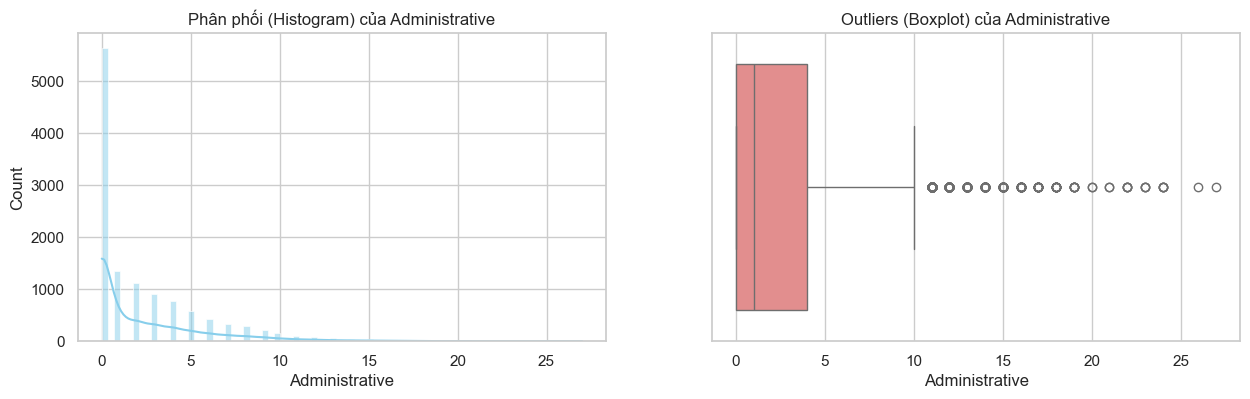

In [130]:
col = 'Administrative'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 99, 999, 9999] )
visualtion(col)

#### 1.2 Phân tích về thống kê cột dữ liệu số Administrative
  * **Phân phối và Xu hướng trung tâm**
    * **Lệch phải nặng (Right-Skewed):** Phần lớn dữ liệu tập trung tại giá trị 0, cho thấy đa số người dùng không truy cập trang quản trị.
    * **Chênh lệch Mean - Median:** Do đuôi dài về phía bên phải, giá trị trung bình (**Mean**) cao hơn trung vị (**Median**). Cụ thể, 50% dữ liệu nằm sát mức 0.

* **3. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **Khoảng giá trị:** Dữ liệu từ 0 đến 27, trong đó 75% tập trung từ 0 đến 4 (**IQR hẹp**), cho thấy sự biến động thấp ở nhóm đa số.
    * **Ngoại lai (Outliers):** Xuất hiện nhiều điểm từ **>10 đến 27**.
       * **Genuine Extreme Values or Data Entry Errors:** Ở góc độ Data Quality: Các outliers này là **dữ liệu thực (natural outliers)** chứ không phải lỗi nhập liệu. Vì chúng phân bố liên tục chứ không nhảy vọt lên (như 1000 hoặc số âm). Đây có thể là những nhóm khách hàng đặc biệt, hành động khác hẳn số đông. Vậy kết luận, các **outliers** này là **genuine extreme values**, có thể là nhóm những người có nhu cầu quản trị cao hơn hẳn người bình thường.

* **Chất lượng dữ liệu (Data Quality)**
    * **Dữ liệu sạch:** Không có giá trị phi lý.
    * **Ý nghĩa:** Giá trị 0 chiếm ưu thế nhưng mang ý nghĩa hành vi (không truy cập), không phải dữ liệu rỗng.

#### 2.1 Thống kê cho cột Administrative Duration


1. Xu hướng tập trung:
   - Mean (Trung bình): 81.65
   - Median (Trung vị): 9.00
   - Std Dev (Độ lệch chuẩn): 177.49
   - Skewness (Độ lệch): 5.59
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0.0 | Max: 3398.75
   - Q1(25%): 0.0 | Q3(75%): 94.7 | IQR: 94.7
   - Lower Bound: -142.05 | Upper Bound: 236.75
   - Số lượng Outliers (IQR method): 1149 | Chiếm 9.41%

3. Chất lượng dữ liệu:
   - Impossible Values: 0
   - Placeholders Values: 0




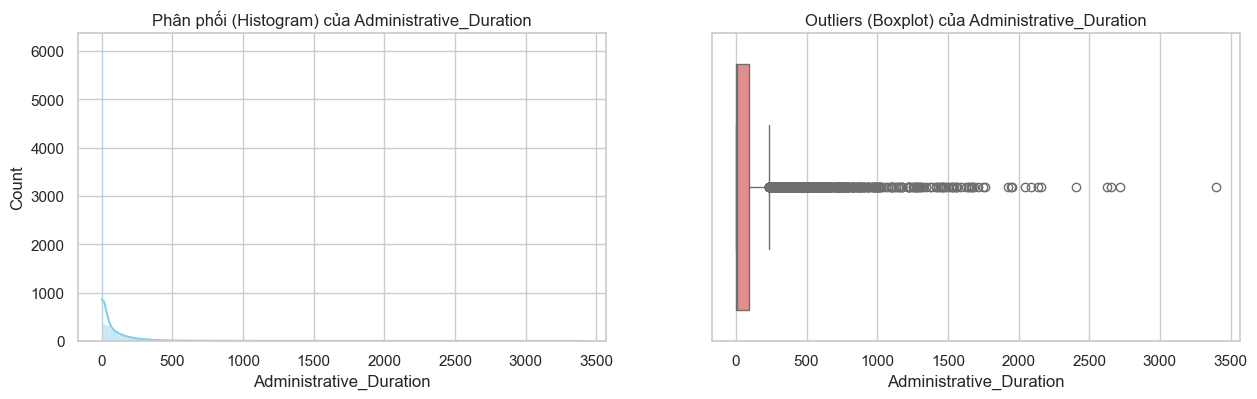

In [131]:
col = 'Administrative_Duration'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -999] )
visualtion(col)

#### 2.2 Phân tích về thống kê cột Administrative Duration
* **1. Về Phân phối và Xu hướng trung tâm**
  * **Dạng phân phối:** Lệch phải rất nặng (Highly Right-Skewed). Đỉnh (Mode) tập trung tại giá trị 0, đồng nhất với dữ liệu cột Administrative.
  * **Mean-Median:**Trung bình bị kéo lên bởi các phiên truy cập kéo dài. Hơn 50% dữ liệu chỉ tập trung ở mức thời gian rất thấp.
* **2. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **Range**: Rất lớn (từ 0 đến ~3400 giây). Tuy nhiên, hộp dữ liệu (IQR) bị nén hẹp ở mức thấp (<100 giây), cho thấy sự đồng nhất về hành vi "truy cập nhanh" ở đại đa số người dùng.
    * **Outliers (ngoại lai)**: Xuất hiện dày đặc từ sau mức ~250 giây đến 3400 giây.
       * **Genuine Extreme Values or Data Entry Errors:** Ở góc độ Data Quality, các outliers này là **dữ liệu thực (genuine extreme values)**. Thời gian 3400 giây (tương đương gần 1 giờ) là hoàn toàn khả thi đối với hành vi người dùng (có thể họ đang đọc kỹ điều khoản, hoặc đơn giản là treo máy/mở tab để đó). Sự phân bố liên tục của các điểm đen chứng tỏ không có sự đứt gãy dữ liệu vô lý.
* **Chất lượng dữ liệu (Data Quality)**
  * Dữ liệu sạch, hợp lý về mặt logic thời gian.

#### 3.1 Thống kê cho cột Informational


1. Xu hướng tập trung:
   - Mean (Trung bình): 0.51
   - Median (Trung vị): 0.00
   - Std Dev (Độ lệch chuẩn): 1.28
   - Skewness (Độ lệch): 4.01
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0 | Max: 24
   - Q1(25%): 0.0 | Q3(75%): 0.0 | IQR: 0.0
   - Lower Bound: 0.0 | Upper Bound: 0.0
   - Số lượng Outliers (IQR method): 2631 | Chiếm 21.56%

3. Chất lượng dữ liệu:
   - Impossible Values: 0
   - Placeholders Values: 0




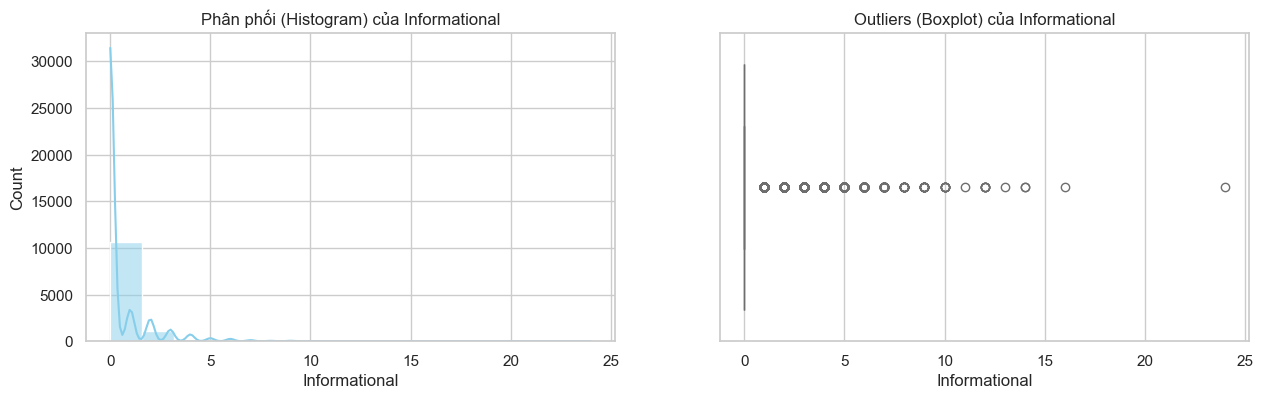

In [132]:
col = 'Informational'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -999, 99, 9999] )
visualtion(col)

#### 3.2 Phân tích về thống kê cột Informational
* **1. Phân phối & Xu hướng trung tâm:**
  * **Dạng phân phối:** Dữ liệu bị **lệch phải cực kỳ nặng (Extremely Right-Skewed)**. Đỉnh (Mode) và Trung vị (Median) đều bằng 0, cho thấy hơn 75% người dùng không truy cập trang thông tin.
  * **Mean > Median:** Giá trị trung bình bị kéo lên bởi các số lượt xem nhỏ (từ 1 đến 24), dù số lượng người truy cập rất ít.
* **2. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **IQR (Interquartile Range):** IQR = 0, cho thấy sự biến động ở nhóm đa số gần như bằng không.
    * **Outliers (Giá trị ngoại lai)**
       * Bất kì giá trị nào lớn hơn 1 đều được xem là ngoại lai so với đám đông.
     * **Genuine Extreme Values or Data Entry Errors:** Các outliers này là **dữ liệu thực (genuine values)**. Việc người dùng xem 1, 2, hay thậm chí 24 trang thông tin là hành vi hoàn toàn bình thường và khả thi trên một website thương mại điện tử, phản ánh hành vi bình thường của một nhóm nhỏ khách hàng có quan tâm đến thông tin.
* **Chất lượng dữ liệu (Data Quality)**
    * Phản ánh chính xác thực tế là người dùng thường ít xem các trang "Informational" so với các loại trang khác trên website thương mại điện tử.
  

#### 4.1 Thống kê cho cột Information Duration


1. Xu hướng tập trung:
   - Mean (Trung bình): 34.83
   - Median (Trung vị): 0.00
   - Std Dev (Độ lệch chuẩn): 141.42
   - Skewness (Độ lệch): 7.54
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0.0 | Max: 2549.375
   - Q1(25%): 0.0 | Q3(75%): 0.0 | IQR: 0.0
   - Lower Bound: 0.0 | Upper Bound: 0.0
   - Số lượng Outliers (IQR method): 2405 | Chiếm 19.71%

3. Chất lượng dữ liệu:
   - Impossible Values: 0
   - Placeholders Values: 0




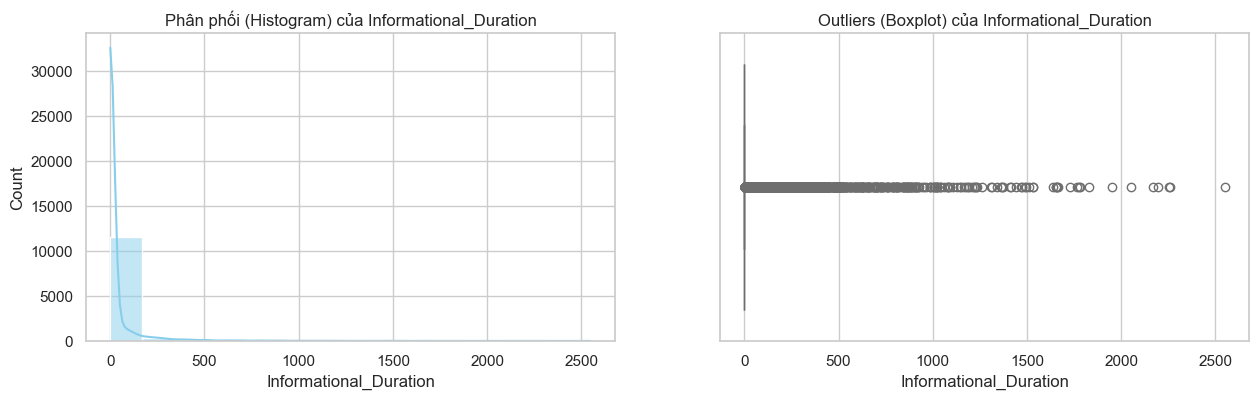

In [133]:
col = 'Informational_Duration'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99] )
visualtion(col)

#### 4.2 Phân tích về thống kê cột Information Duration
* **1. Phân phối và xu hướng trung tâm** 
  * **Dạng phân phối:** Dữ liệu bị **lệch phải cực kì nặng (Extremely Right-Skewed)**. Đa số người dùng dành 0 giây cho các trang thông tin (Mode & Median = 0).
  * **Mean > Meadian:** Giá trị trung bình bị kéo cao đáng kể bởi một nhóm nhỏ người dùng có thời gian truy cập rất lâu (đuôi biểu đồ kéo dài tới >2500s).
* **2. Độ phân tán & Outliers:**
    * **Biến động thấp ở nhóm đa số:** IQR bằng 0 (Q1 = Q3 = 0), cho thấy hành vi "không xem" là đồng nhất ở phần lớn dữ liệu.
    * **Outliers (Giá trị ngoại lai):** Xuất hiện dải Outliers dày đặc từ >0 đến hơn 2500 giây (~41 phút). Đây là dữ liệu thực (natural outliers), phản ánh nhóm khách hàng kỹ tính dành nhiều thời gian nghiên cứu thông tin/chính sách.
* **3. Chất lượng dữ liệu (Data Quality)**
    * Dữ liệu sạch và hợp lý về mặt logic. Tuy nhiên, do phần lớn dữ liệu tập trung tại 0, cột này có độ lệch rất cao, cần cân nhắc kỹ thuật xử lý (như phân nhóm người (nhóm có thời gian xem trên 0 và bằng 0))

#### 5.1 Thống kê cho cột Product Related


1. Xu hướng tập trung:
   - Mean (Trung bình): 32.05
   - Median (Trung vị): 18.00
   - Std Dev (Độ lệch chuẩn): 44.59
   - Skewness (Độ lệch): 4.33
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0 | Max: 705
   - Q1(25%): 8.0 | Q3(75%): 38.0 | IQR: 30.0
   - Lower Bound: -37.0 | Upper Bound: 83.0
   - Số lượng Outliers (IQR method): 1007 | Chiếm 8.25%

3. Chất lượng dữ liệu:
   - Impossible Values: 0
   - Placeholders Values: 0




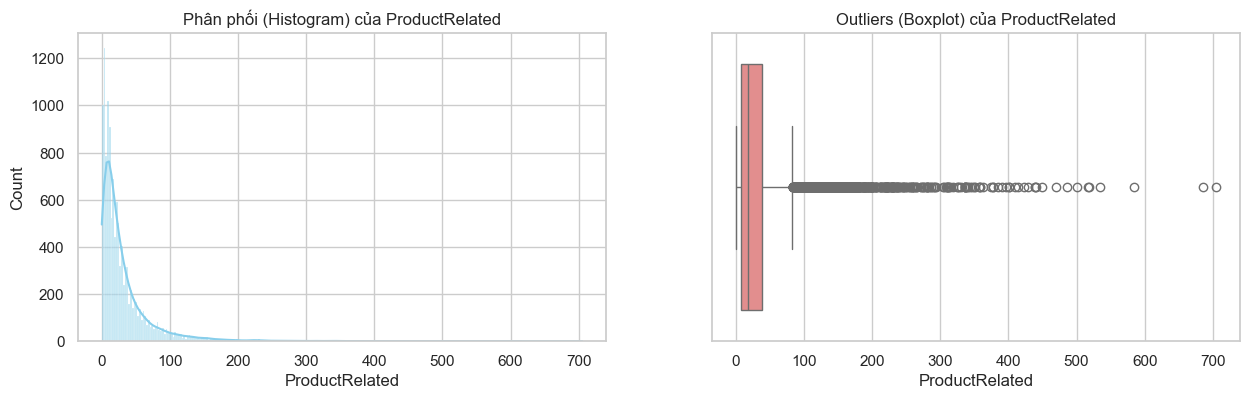

In [134]:
col = 'ProductRelated'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 9999] )
visualtion(col)

#### 5.2 Phân tích về thống kê cột Product Related
* **1. Phân phối & Xu hướng trung tâm:**
  * **Lệch phải (Right-Skewed)**: Tuy vẫn lệch phải nhưng phân phối "thoải" hơn hẳn các cột khác. Đỉnh tập trung ở khoảng 0–30 trang, cho thấy lướt sản phẩm là hoạt động chính của người dùng.
  * **Trung vị (Median = 18.00):** Khác biệt rõ rệt khi Median không nằm ở mức 0, phản ánh một người dùng bình thường xem khoảng 18 sản phẩm.
  * **Mean (31.71) > Median:** Giá trị trung bình bị đẩy lên cao do tác động của nhóm ngoại lai cực lớn.

* **2. Độ phân tán & Outliers:**
    * **Độ biến thiên cao (IQR = 31):** Khoảng tứ phân vị rộng cho thấy hành vi xem sản phẩm của khách hàng phổ thông rất đa dạng.
    * **Outliers (Giá trị ngoại lai)**: Xuất hiện dày đặc từ 100 đến hơn 700.
       * Biểu đồ Boxplot cho thấy một lượng **Outliers khổng lồ và dày đặc**. Các outliers xuất hiện và xuất hiện dày đặc từ khoảng giá trị 100 và kéo dài liên tục đến hơn 700.
    * **Đánh giá ngoại lai:** Phần lớn là **dữ liệu thực (genuine values)** từ nhóm khách hàng "window shopping" hoặc có nhu cầu mua sắm lớn. Các giá trị cực cao (>500) có thể là hành vi của Bot hoặc Crawler nhưng vẫn giữ tính liên tục, không có dấu hiệu lỗi nhập liệu.

* **Chất lượng dữ liệu (Data Quality)**
    * Cột dữ liệu "sạch" và giàu thông tin nhất (High Information Gain), do có sự phân hóa hành vi rõ rệt giữa các nhóm người dùng.n loại hành vi người dùng trong mô hình dự đoán
    * Không có giá trị phi lý, phản ánh đúng bản chất website thương mại điện tử.

#### 6.1 Thống kê cho cột Product Related Duration


1. Xu hướng tập trung:
   - Mean (Trung bình): 1206.98
   - Median (Trung vị): 608.94
   - Std Dev (Độ lệch chuẩn): 1919.60
   - Skewness (Độ lệch): 7.25
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0.0 | Max: 63973.52223
   - Q1(25%): 193.0 | Q3(75%): 1477.154762 | IQR: 1284.154762
   - Lower Bound: -1733.2321429999997 | Upper Bound: 3403.3869049999994
   - Số lượng Outliers (IQR method): 951 | Chiếm 7.79%

3. Chất lượng dữ liệu:
   - Impossible Values: 0
   - Placeholders Values: 10




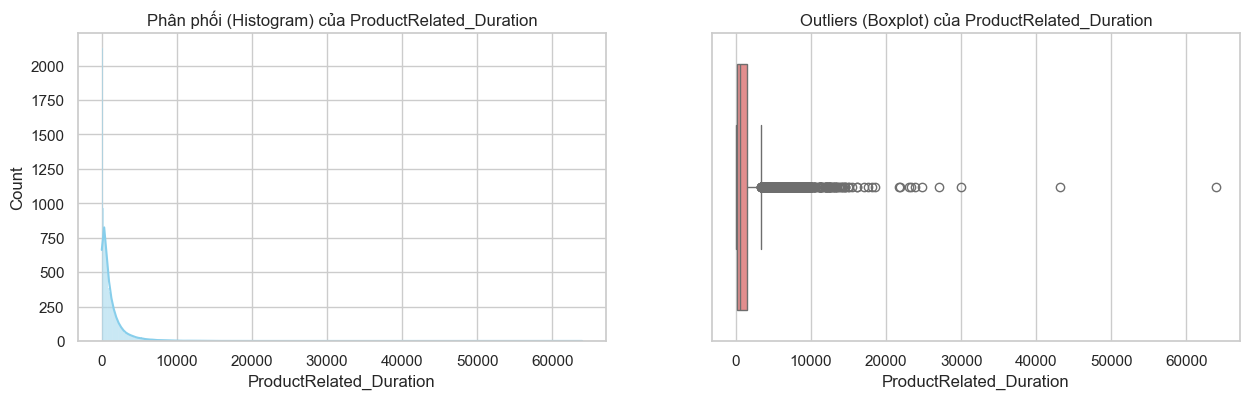

In [135]:
col = 'ProductRelated_Duration'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 99, 999, 9999] )
visualtion(col)

#### 6.2 Phân tích về thống kê cột Product Related Duration
* **1. Phân phối và xu hướng trung tâm:**
  * **Lệch phải nặng (Highly Right-Skewed):** Dữ liệu bị **lệch phải nặng (Highly Right-Skewed)**. Tuy nhiên, đường cong có độ thoải, cho thấy người dùng thực sự dành thời gian tương tác thay vì rời đi ngay.

  * **Chênh lệch Mean - Median:** Mean (1194.75s) cao gấp đôi Median (598.94s) do bị kéo bởi các giá trị ngoại lai cực lớn. Một người dùng bình thường dành khoảng 10 phút (598s) để xem sản phẩm.
* **2. Độ phân tán & Outliers:**
    * **Khoảng biến thiên rộng:** NDữ liệu từ 0 đến 63.973s (~17 giờ). Đây là cột có độ biến thiên lớn nhất trong các chỉ số thời gian.
    * **Bản chất ngoại lai:** Được xác định là **dữ liệu thực (genuine values)** về mặt kỹ thuật. Nhóm >20.000s có thể là hành vi "treo máy" (mở tab rồi bỏ đó) hoặc Bot, trong khi nhóm <5.000s phản ánh phiên mua sắm tích cực của người dùng kỹ tính.
* **3. Chất lượng dữ liệu (Data Quality):**
    * Dữ liệu sạch, hợp lệ, không có lỗi nhập liệu thủ công (do hệ thống ghi tự động).
    * Độ biến thiên cao giúp phân loại rõ rệt giữa khách hàng vãng lai và khách hàng tiềm năng.

#### 7.1 Thống kê cho cột Bounce Rate


1. Xu hướng tập trung:
   - Mean (Trung bình): 0.02
   - Median (Trung vị): 0.00
   - Std Dev (Độ lệch chuẩn): 0.05
   - Skewness (Độ lệch): 3.16
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0.0 | Max: 0.2
   - Q1(25%): 0.0 | Q3(75%): 0.016666667 | IQR: 0.016666667
   - Lower Bound: -0.0250000005 | Upper Bound: 0.041666667500000004
   - Số lượng Outliers (IQR method): 1428 | Chiếm 11.70%

3. Chất lượng dữ liệu:
   - Impossible Values: 0
   - Placeholders Values: 0




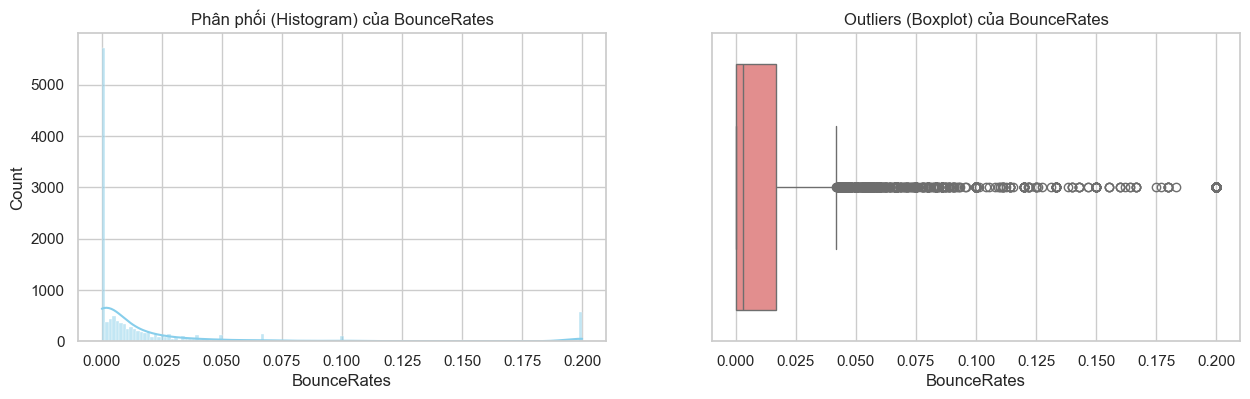

In [136]:
col = 'BounceRates'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 99, 999, 9999] )
visualtion(col)

#### 7.2 Phân tích về thống kê cột Bounce Rate
* **1. Phân phối & Xu thế trung tâm**
  * **Lệch phải cực kỳ nặng (Extremely Right-Skewed):** Phần lớn dữ liệu tập trung tại giá trị 0.00 (Mode & Median = 0.00). Điều này cho thấy đa số phiên truy cập có sự tương tác tốt, không thoát ngay lập tức.

  * **Mean > Median:** Giá trị trung bình (0.02) bị kéo lên bởi các giá trị thoát cao phía đuôi đồ thị. Đặc biệt, có một đỉnh phụ xuất hiện tại mốc cực đại 0.20.

* **2. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **IQR rất hẹp:** Dao động chủ yếu từ 0.00 đến 0.02, chứng tỏ hành vi của nhóm người dùng phổ thông rất đồng nhất (tỉ lệ thoát rất thấp).
    * **Outliers (Ngoại lai)**: Xuất hiện dày đặc từ 0.05 đến 0.20.
    * **Bản chất ngoại lai:** Được xác định là **dữ liệu thực (genuine values)**. Nhóm tập trung tại mốc 0.20 đại diện cho các phiên truy cập không có sự tương tác hoặc người dùng rời đi ngay sau khi vào trang đích.
* **Chất lượng dữ liệu (Data Quality)**
    * Nhìn chung, dữ liệu sạch. Sự tập trung lớn tại mức 0 phản ánh website có nội dung khá lôi cuốn hoặc cấu trúc trang giữ chân người dùng tốt.
        

#### 8.1 Thống kê cho cột Exit Rate


1. Xu hướng tập trung:
   - Mean (Trung bình): 0.04
   - Median (Trung vị): 0.03
   - Std Dev (Độ lệch chuẩn): 0.05
   - Skewness (Độ lệch): 2.23
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0.0 | Max: 0.2
   - Q1(25%): 0.014230973 | Q3(75%): 0.048529412 | IQR: 0.034298439
   - Lower Bound: -0.0372166855 | Upper Bound: 0.0999770705
   - Số lượng Outliers (IQR method): 1325 | Chiếm 10.86%

3. Chất lượng dữ liệu:
   - Impossible Values: 0
   - Placeholders Values: 0




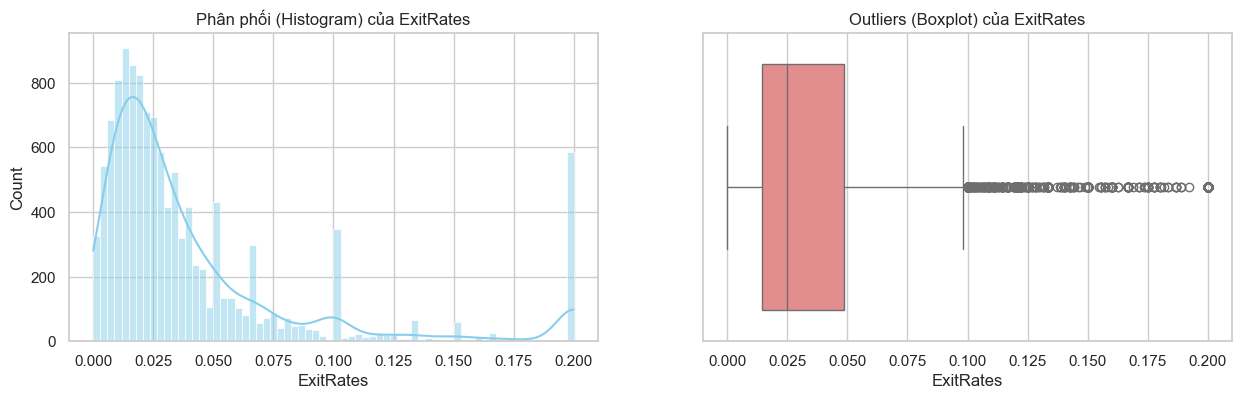

In [137]:
col = 'ExitRates'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 99, 999, 9999] )
visualtion(col)

#### 8.2 Phân tích về thống kê cột Exit Rate
* **1. Phân phối & Xu hướng trung tâm**
  * **DLệch phải (Right-Skewed):**Đỉnh chính nằm ở mức thấp (0.01 – 0.03), nhưng xuất hiện đỉnh phụ đột biến tại giá trị cực đại 0.20.
  * **Tính chất "Hai đỉnh" (Bimodal):** Phản ánh rõ rệt hai nhóm trang web: nhóm giữ chân người dùng tốt (Exit Rate thấp) và nhóm có tỷ lệ thoát cao (Exit Rate = 20%).

  * **Chênh lệch Mean - Median:** Mean (0.04) lớn hơn Median (0.03) do chịu tác động mạnh từ nhóm có tỷ lệ thoát tối đa 20%.
* **2. Độ phân tán & Outliers**
    * **IQR (0.0357):** Cho thấy 50% dữ liệu ở giữa có biến động ổn định trong mức chấp nhận được.
    * **Ngoại lai (Outliers):** Ngoại lai (Outliers):
    * **Bản chất ngoại lai:** Đây là **dữ liệu thực**. Các trang có Exit Rate cao (đặc biệt là mức 0.20) thường là các trang đích cuối cùng (như trang "Cảm ơn đã mua hàng") hoặc các trang bị lỗi/nội dung kém khiến người dùng thoát ngay.
* **Chất lượng dữ liệu (Data Quality)** 
    * Dữ liệu sạch, hợp lệ. Phân phối có tính chất "hai đỉnh" nhẹ (bimodal behavior) ở đầu và cuối, đây là tín hiệu tốt để phân nhóm các trang "Performance tốt" và "Performance kém".

#### 9.1 Thống kê cho cột Page Values


1. Xu hướng tập trung:
   - Mean (Trung bình): 5.95
   - Median (Trung vị): 0.00
   - Std Dev (Độ lệch chuẩn): 18.65
   - Skewness (Độ lệch): 6.35
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0.0 | Max: 361.7637419
   - Q1(25%): 0.0 | Q3(75%): 0.0 | IQR: 0.0
   - Lower Bound: 0.0 | Upper Bound: 0.0
   - Số lượng Outliers (IQR method): 2730 | Chiếm 22.37%

3. Chất lượng dữ liệu:
   - Impossible Values: 0
   - Placeholders Values: 0




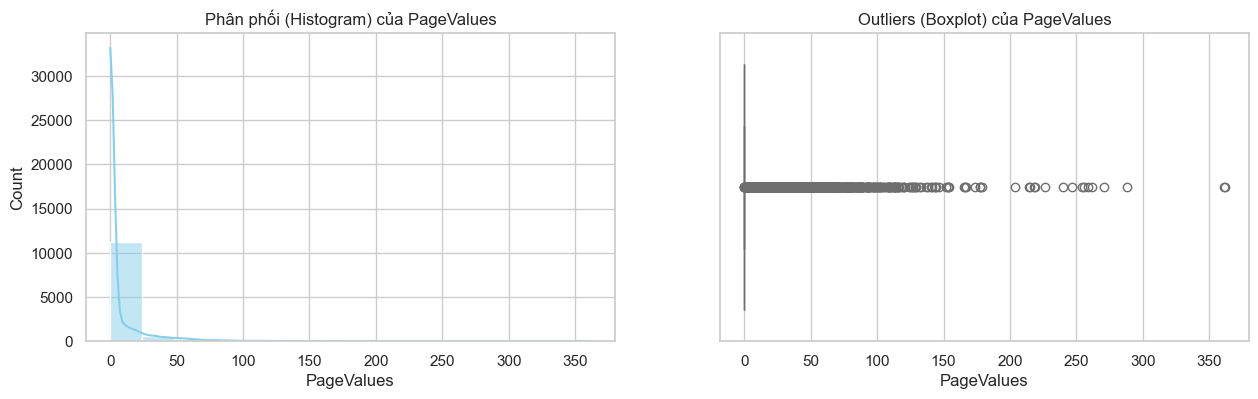

In [138]:
col = 'PageValues'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 99, 999, 9999] )
visualtion(col)

#### 9.2 Phân tích về thống kê cột Page Values
* **1. Phân phối và Xu hướng trung tâm:**
  * **Phân phối lạm phát số 0 (Zero-inflated):** Lệch phải cực kỳ nặng với đại đa số giá trị bằng 0. Điều này phản ánh thực tế rằng phần lớn các trang không đóng góp trực tiếp vào giá trị giao dịch.
  * **Mean > Median:** Mean (5.89) cao hơn hẳn so với Median (0.00) do bị kéo bởi các trang có giá trị chuyển đổi lớn.

* **2.Độ phân tán & Outliers:**
    * **Biến động tập trung:** Q1, Q3 và IQR đều bằng 0, cho thấy sự đồng nhất tuyệt đối ở nhóm trang không tạo ra giá trị.
    * **Dải Outliers** kéo dài từ >0 đến hơn 360.
* **3. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **Range**: Dữ liệu trải dài từ 0 đến khoảng 360. Khoảng biến thiên rất lớn.
    * **Bản chất ngoại lai:** Đây là dữ liệu thực (genuine values) và là "tín hiệu vàng". Những giá trị ngoại lai này đại diện cho các trang có tác động trực tiếp đến doanh thu.

* **Chất lượng dữ liệu (Data Quality)**
    *  Dữ liệu chất lượng cao cho mục đích phân loại. Mặc dù bị lệch nặng, nhưng sự khác biệt giữa giá trị 0 và lớn hơn 0 là yếu tố then chốt để dự đoán doanh thu.

#### 10.1 Thống kê cho cột Special Day


1. Xu hướng tập trung:
   - Mean (Trung bình): 0.06
   - Median (Trung vị): 0.00
   - Std Dev (Độ lệch chuẩn): 0.20
   - Skewness (Độ lệch): 3.29
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0.0 | Max: 1.0
   - Q1(25%): 0.0 | Q3(75%): 0.0 | IQR: 0.0
   - Lower Bound: 0.0 | Upper Bound: 0.0
   - Số lượng Outliers (IQR method): 1249 | Chiếm 10.23%

3. Chất lượng dữ liệu:
   - Impossible Values: 0
   - Placeholders Values: 0




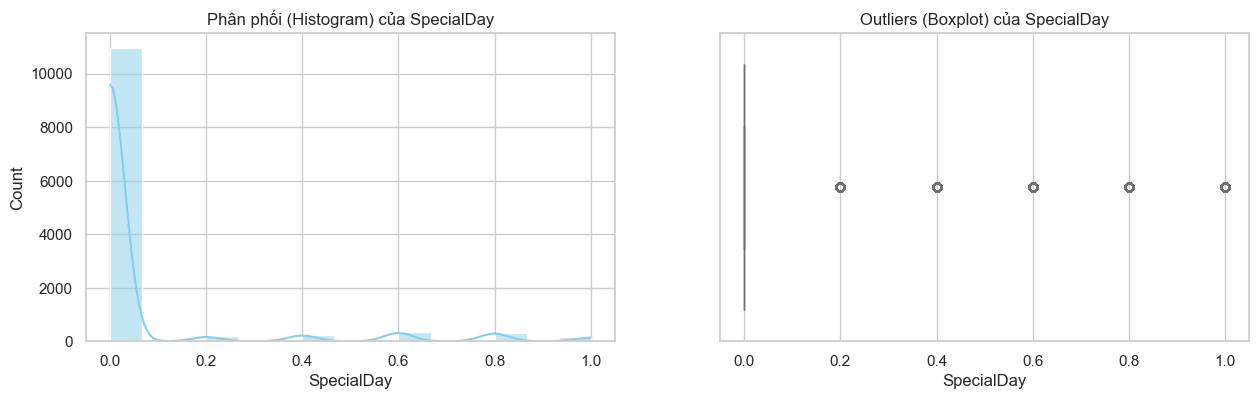

In [139]:
col = 'SpecialDay'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 99, 999, 9999] )
visualtion(col)

#### 10.2 Phân tích về thống kê cột Special Day
* **1. Phân phối & Xu hướng trung tâm:**
  * **Lệch phải & Rời rạc (Right-Skewed & Discrete):** Dữ liệu tập trung chủ yếu tại giá trị 0 (Mode & Median = 0), cho thấy đại đa số các phiên truy cập diễn ra vào ngày thường.
  * **Phân cụm:** Các cột dữ liệu xuất hiện theo từng nấc cụ thể (0.2, 0.4, 0.6, 0.8, 1.0) thay vì dải liên tục, biểu thị mức độ "gần" ngày lễ.
  * **Mean (0.06) > Median:** Giá trị trung bình bị kéo lên bởi các phiên truy cập trong các giai đoạn mua sắm cao điểm.

* **2. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **Biến động thấp ở nhóm đa số:**: IQR bằng 0 (Q1 = Q3 = 0), xác nhận hành vi truy cập ngày lễ là thiểu số trong bộ dữ liệu.
    * **Outliers (Giá trị ngoại lai)**: Các giá trị từ 0.2 đến 1.0 được coi là ngoại lai về mặt thống kê.
    * **Bản chất ngoại lai:** Là dữ liệu thực (genuine values), phản ánh yếu tố mùa vụ (seasonal factor). Những điểm này xuất hiện ít vì các dịp lễ chỉ chiếm tỷ lệ nhỏ thời gian trong năm.
* **Chất lượng dữ liệu (Data Quality)**
    * Dữ liệu sạch, nằm chuẩn trong biên độ [0, 1], không có giá trị phi lý cũng như không có placeholders.
    * Do tính chất tập trung tại các mốc cố định, biến này  có thể được xem xét như một biến phân loại (categorical) hoặc biến thứ bậc thay vì biến số liên tục để đạt hiệu quả tốt nhất trong mô hình.

<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        IV. Về các cột Categorical
    </h3>
</div>

In [140]:

target_col = 'Revenue'

In [141]:
# Xác định các cột categorical
print("="*50)
print("CÁC CỘT CATEGORICAL:")
print("="*50)
print(f"Tổng số cột categorical: {len(categorical_cols)}")
print(f"Tên các cột: {categorical_cols}\n")

CÁC CỘT CATEGORICAL:
Tổng số cột categorical: 8
Tên các cột: ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']



In [142]:
print("="*50)
print("PHÂN PHỐI GIÁ TRỊ CÁC CỘT CATEGORICAL")
print("="*50)

for col in categorical_cols:
    print(f"- Cột: {col}")
    
    # Số lượng giá trị khác nhau (unique values)
    n_unique = data[col].nunique()
    print(f"    + Số lượng giá trị khác nhau (Unique): {n_unique}")
    
    # Phân phối tần suất
    value_counts = data[col].value_counts(dropna=False)
    print(f"    + Top 10 giá trị xuất hiện nhiều nhất:")
    print(value_counts.head(10))
    
    # Kiểm tra cân bằng phân phối
    if n_unique > 1:
        most_freq = value_counts.iloc[0]
        least_freq = value_counts.iloc[-1]
        ratio = most_freq / least_freq if least_freq > 0 else float('inf')
        print(f"    + Tần suất cao nhất: {most_freq} | Tần suất thấp nhất: {least_freq}")
        print(f"    + Tỷ lệ cân bằng: {ratio:.2f}:1")
        if ratio > 10:
            print(f"-> Phân phối rất lệch (Highly Imbalanced)\n")
        elif ratio > 3:
            print(f"-> Phân phối lệch (Imbalanced)\n")
        else:
            print(f"-> Phân phối cân bằng (Balanced)\n")

PHÂN PHỐI GIÁ TRỊ CÁC CỘT CATEGORICAL
- Cột: Month
    + Số lượng giá trị khác nhau (Unique): 10
    + Top 10 giá trị xuất hiện nhiều nhất:
Month
May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: count, dtype: int64
    + Tần suất cao nhất: 3329 | Tần suất thấp nhất: 0
    + Tỷ lệ cân bằng: inf:1
-> Phân phối rất lệch (Highly Imbalanced)

- Cột: OperatingSystems
    + Số lượng giá trị khác nhau (Unique): 8
    + Top 10 giá trị xuất hiện nhiều nhất:
OperatingSystems
2    6541
1    2549
3    2530
4     478
8      75
6      19
7       7
5       6
Name: count, dtype: int64
    + Tần suất cao nhất: 6541 | Tần suất thấp nhất: 6
    + Tỷ lệ cân bằng: 1090.17:1
-> Phân phối rất lệch (Highly Imbalanced)

- Cột: Browser
    + Số lượng giá trị khác nhau (Unique): 13
    + Top 10 giá trị xuất hiện nhiều nhất:
Browser
2     7883
1     2427
4      731
5      465
6      174
10     163
8      135
3      105
13      5

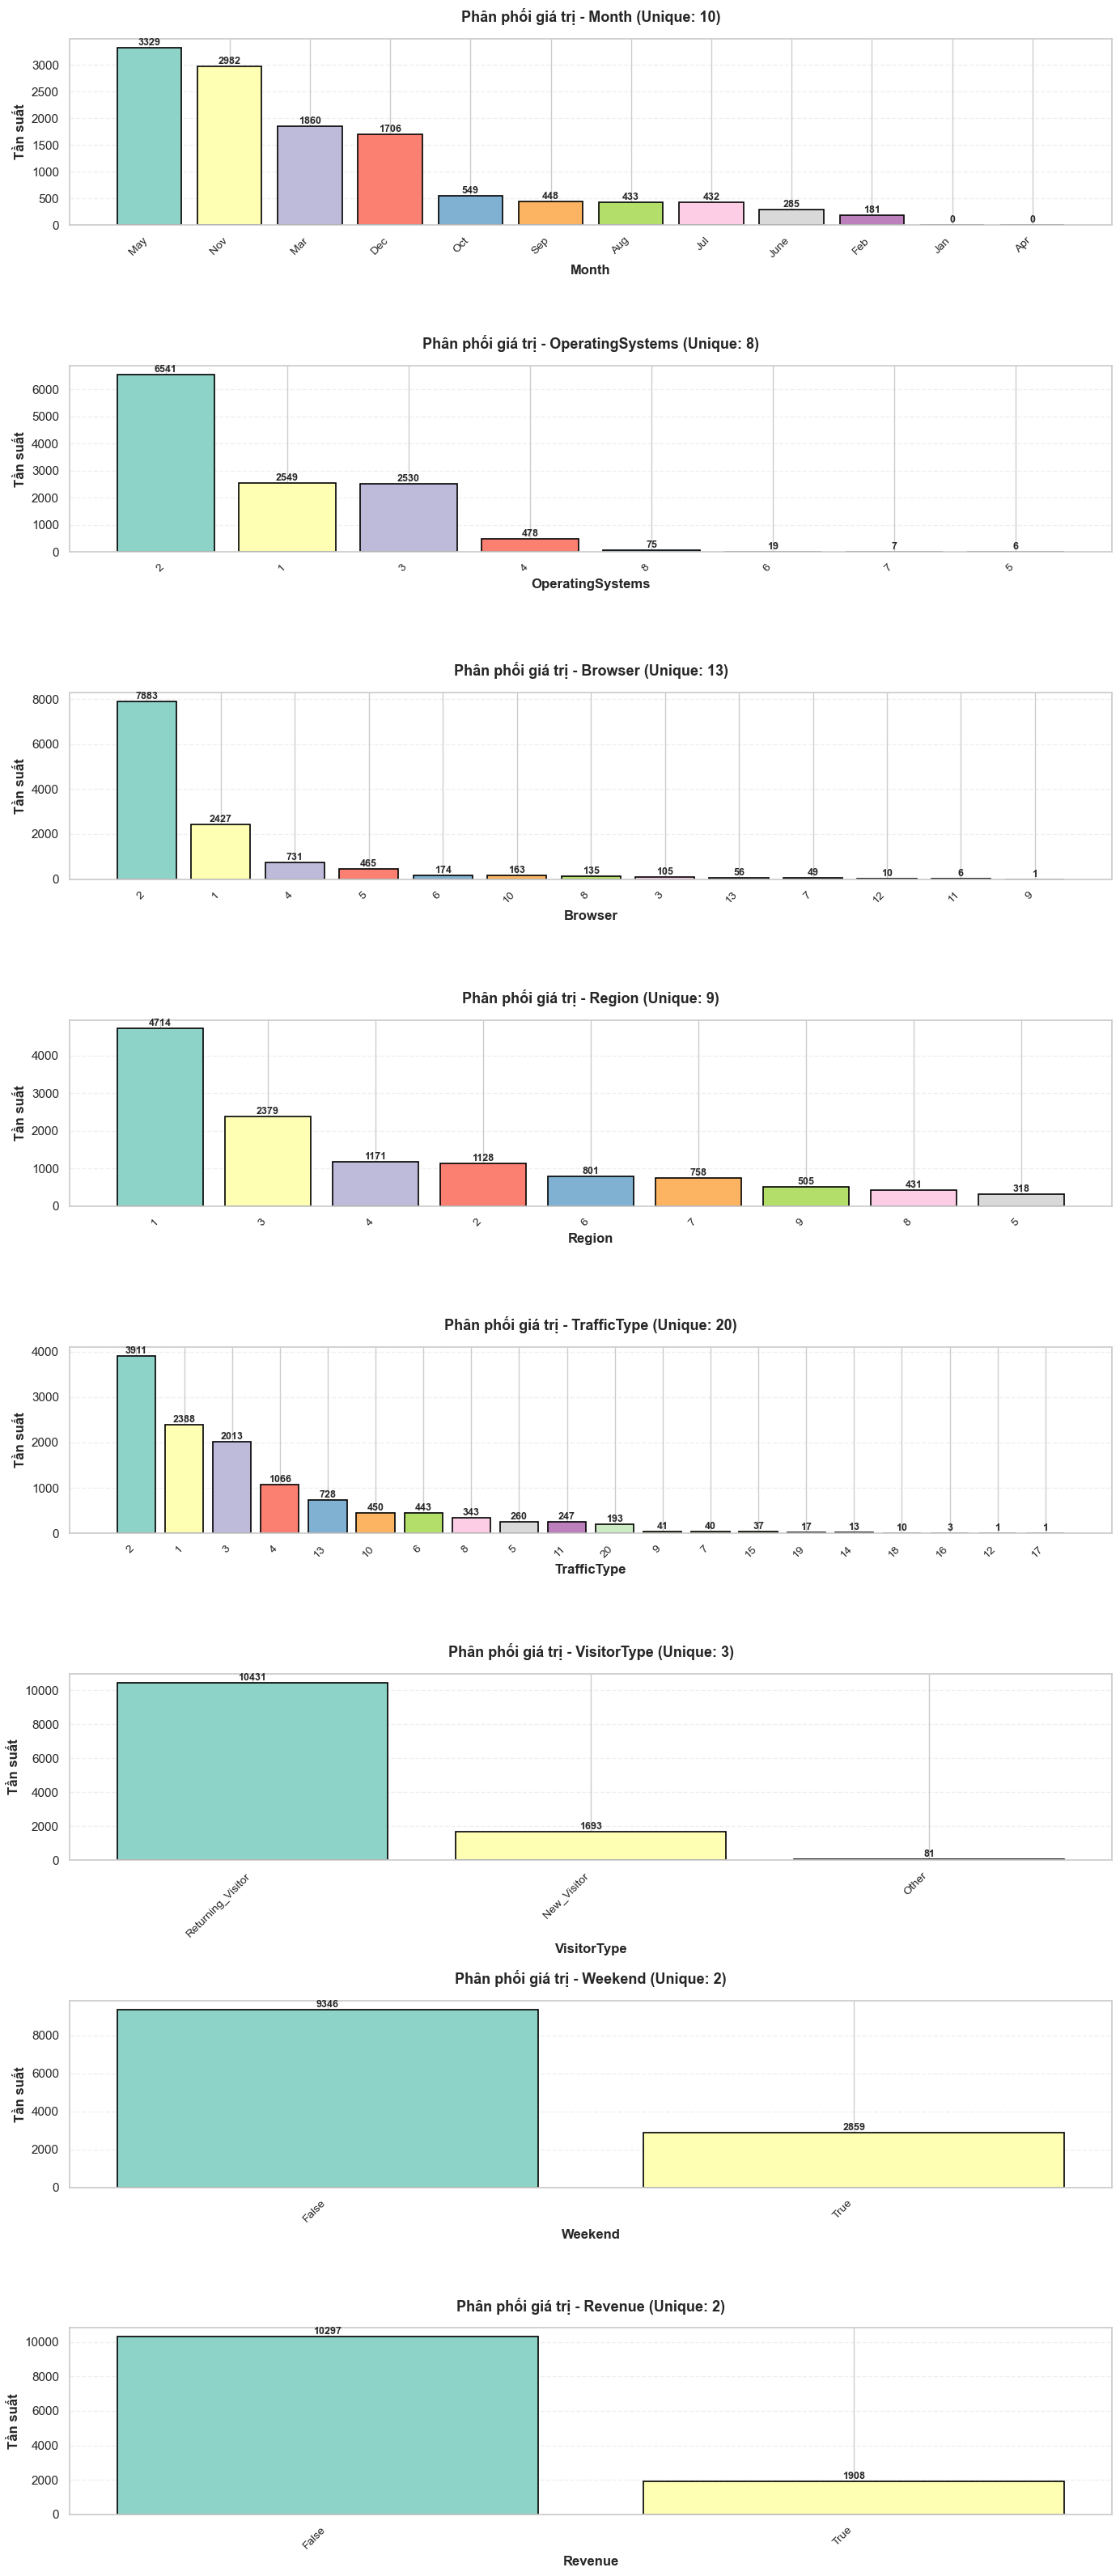

In [143]:
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(14, 4*len(categorical_cols)))

for idx, col in enumerate(categorical_cols):
    ax = axes[idx]
    
    # Tạo count plot
    value_counts = data[col].value_counts(dropna=False)
    colors = plt.cm.Set3(range(len(value_counts)))
    
    bars = ax.bar(range(len(value_counts)), value_counts.values, color=colors, edgecolor='black', linewidth=1.2)
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=10)
    ax.set_xlabel(f'{col}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Tần suất', fontsize=12, fontweight='bold')
    ax.set_title(f'Phân phối giá trị - {col} (Unique: {data[col].nunique()})', fontsize=13, fontweight='bold', pad=15)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Thêm giá trị lên từng cột
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

#### 1. Tổng quan về tập dữ liệu
* **Đặc điểm chính:** Hầu hết các đặc trưng (features) đều có sự phân phối **lệch (skewed)**, dữ liệu không đồng đều giữa các nhóm.

---

#### 2. Phân tích chi tiết từng đặc trưng
##### Thời gian (Month & Weekend)
* **Month (Tháng):**
    * **Cao điểm:** Tháng 5 (`May`) và tháng 11 (`Nov`). Có thể liên quan đến các đợt khuyến mãi hoặc sự kiện theo mùa.
    * **Thấp điểm:** Tháng 2 (`Feb`).
    * **Lưu ý:** Dữ liệu chỉ có 10 tháng (Unique: 10), thiếu tháng 1 và tháng 4.
* **Weekend (Cuối tuần):**
    * Lượng truy cập vào **Ngày thường (False)** cao gấp **3 lần** so với **Cuối tuần (True)**.
    * -> **Insight:** Website có thể phục vụ cho công việc (B2B), tin tức tài chính hoặc công cụ học tập.

##### Công nghệ 
* **OS:** `Label 2` chiếm ưu thế vượt trội (> 6000), theo sau là `1`.
* **Browser:** `Label 2` chiếm thị phần áp đảo (gần 8000).
* -> **Insight:** Người dùng có xu hướng sử dụng công nghệ tập trung, ít đa dạng. Cần tối ưu giao diện (UI/UX) cho các nền tảng phổ biến này trước.

##### Hành vi người dùng
* **VisitorType:**
    * **Returning_Visitor (Khách quay lại):** 10,431 (Chiếm đa số).
    * **New_Visitor (Khách mới):** 1,693.
    * -> **Insight:** Tỷ lệ giữ chân khách hàng (Retention) rất tốt. Tuy nhiên, việc thu hút khách hàng mới (Acquisition) đang thấp.
* **TrafficType:**
    * Phân phối dạng đuôi dài (Long tail). `Type 2` cao nhất, các loại nguồn khác giảm dần.

* **Region:**
    * `Region 1` đóng góp lượng truy cập lớn nhất (gần 5000).

---

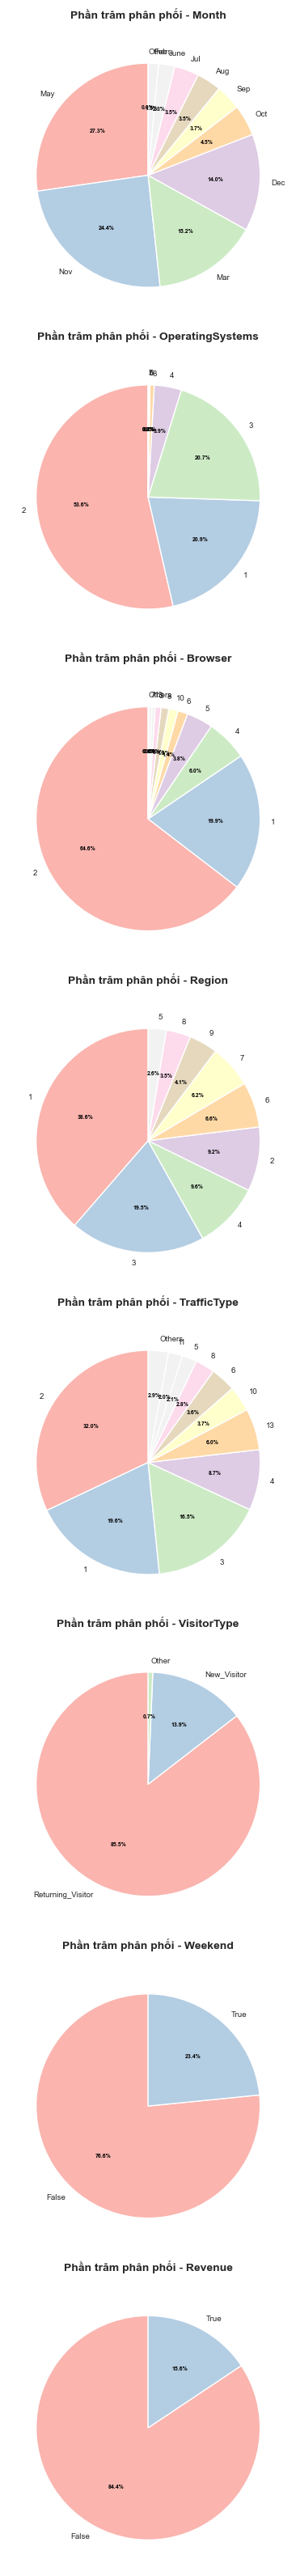

In [144]:
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(12, 4*len(categorical_cols)))

for idx, col in enumerate(categorical_cols):
    ax = axes[idx]
    
    # Lấy top 10 categories (nếu nhiều hơn sẽ ghép "Others")
    value_counts = data[col].value_counts(dropna=False)
    if len(value_counts) > 10:
        top_10 = value_counts.head(10)
        others = value_counts.iloc[10:].sum()
        top_10['Others'] = others
        value_counts = top_10
    
    colors = plt.cm.Pastel1(range(len(value_counts)))
    wedges, texts, autotexts = ax.pie(value_counts.values, 
                                        labels=value_counts.index, 
                                        autopct='%1.1f%%',
                                        colors=colors,
                                        startangle=90,
                                        textprops={'fontsize': 7},
                                        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
    
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(5)
    
    ax.set_title(f'Phần trăm phân phối - {col}', fontsize=10, fontweight='bold', pad=15)

plt.tight_layout()
plt.show()

Biểu đồ tròn làm nổi bật **cơ cấu phần trăm** và sự chênh lệch giữa các nhóm.

---

#### Phân tích Chi tiết Tỷ trọng

##### Yếu tố Thời gian
* **Month (Tháng):**
    * **Sự tập trung cao độ:** Top 4 tháng dẫn đầu (`May`, `Nov`, `Mar`, `Dec`) chiếm khoảng **81%** tổng dữ liệu.
    * **Tháng 5 (May):** Chiếm thị phần lớn nhất (**27.3%**).
    * **Các tháng còn lại:** Chiếm tỷ trọng rất nhỏ (1-3%), cho thấy tính thời vụ mạnh mẽ.
* **Weekend (Cuối tuần):**
    * **Ngày thường (76.7%)** áp đảo so với **Cuối tuần (23.3%)**.
    * -> **Kết luận:** Website chủ yếu được truy cập vào giờ hành chính/ngày làm việc.

##### Hành vi Khách hàng (User Behavior)
* **VisitorType (Loại khách):**
    * **Returning Visitor:** Chiếm **85.6%** (Rất cao).
    * **New Visitor:** Chỉ chiếm **13.7%**.
    * -> **Insight:** Website có khả năng giữ chân khách hàng (Retention) tốt, nhưng khả năng thu hút khách mới (Acquisition) đang yếu.

##### Hạ tầng và Công nghệ
* **OperatingSystems (OS):**
    * `OS 2` chiếm quá bán (**53.5%**).
    * Top 3 OS (`2`, `1`, `3`) cộng lại chiếm tới **95%**.
* **Browser:**
    * `Browser 2` chiếm thế độc tôn (**64.6%**).
    * Các trình duyệt còn lại bị phân mảnh mạnh (đuôi dài).

##### Khu vực và Nguồn truy cập
* **Region:** Phân phối đều hơn các đặc trưng khác, nhưng `Region 1` vẫn lớn nhất (**38.8%**).
* **TrafficType:** `Type 2` dẫn đầu (**31.7%**).

---

In [145]:
print("="*50)
print("BẢNG TÓM TẮT CHẤT LƯỢNG DỮ LIỆU CATEGORICAL")
print("="*50)

summary_data = []
for col in categorical_cols:
    n_unique = data[col].nunique()
    missing_count = data[col].isna().sum()
    missing_ratio = (missing_count / len(data)) * 100
    value_counts = data[col].value_counts(dropna=False)
    most_freq_value = value_counts.index[0]
    most_freq_count = value_counts.iloc[0]
    most_freq_ratio = (most_freq_count / len(data)) * 100
    
    summary_data.append({
        'Cột': col,
        'Số Unique': n_unique,
        'Missing (%)': f'{missing_ratio:.2f}%',
        'Giá trị phổ biến nhất': most_freq_value,
        'Tần suất (%)': f'{most_freq_ratio:.2f}%'
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

BẢNG TÓM TẮT CHẤT LƯỢNG DỮ LIỆU CATEGORICAL
             Cột  Số Unique Missing (%) Giá trị phổ biến nhất Tần suất (%)
           Month         10       0.00%                   May       27.28%
OperatingSystems          8       0.00%                     2       53.59%
         Browser         13       0.00%                     2       64.59%
          Region          9       0.00%                     1       38.62%
     TrafficType         20       0.00%                     2       32.04%
     VisitorType          3       0.00%     Returning_Visitor       85.46%
         Weekend          2       0.00%                 False       76.58%
         Revenue          2       0.00%                 False       84.37%


___
#### Đánh giá Bảng Tóm tắt Chất lượng Dữ liệu

##### 1. Tính Toàn vẹn của Dữ liệu:
* **Không có giá trị khuyết (Missing Values):** Tất cả các cột đều có tỉ lệ Missing là **0.00%**.
* **Kết luận:** Dữ liệu rất sạch về mặt kỹ thuật, bạn không cần thực hiện các bước xử lý điền khuyết.

##### 2. Phân tích Độ đa dạng
* **Biến có độ đa dạng cao:** `TrafficType` (20 giá trị) và `Browser` (13 giá trị).
    * *Lưu ý:* Khi mã hóa (encoding) các biến này, cần thận trọng nếu dùng One-Hot Encoding vì sẽ tạo ra quá nhiều cột mới.
* **Biến có độ đa dạng thấp:** `VisitorType` (3), `Weekend` (2). Các biến này thích hợp làm biến phân loại chính hoặc đích dự đoán.
* **Vấn đề về thời gian:** Cột `Month` chỉ có **10** giá trị unique. Một năm có 12 tháng -> **Dữ liệu bị thiếu 2 tháng**.

##### 3. Mất cân bằng dữ liệu
Hầu hết các biến đều bị lệch (skewed), tức là một giá trị chiếm ưu thế áp đảo:

| Cột | Giá trị phổ biến nhất | Tỷ lệ chiếm (%) | Nhận xét |
| :--- | :---: | :---: | :--- |
| **VisitorType** | Returning_Visitor | **85.57%** | **Rất lệch.** Mô hình sẽ có xu hướng học thiên vị theo nhóm khách quay lại. Cần kỹ thuật xử lý (Resampling/Class Weight). |
| **Weekend** | False | **76.74%** | Phản ánh đúng thực tế (5 ngày thường vs 2 ngày cuối tuần). |
| **Browser** | 2 | **64.57%** | Người dùng tập trung vào một trình duyệt cụ thể. |
| **OperatingSystems** | 2 | **53.54%** | Hệ điều hành cũng tương tự Browser. |

In [146]:
print("="*50)
print("KIỂM TRA SỰ KHÔNG NHẤT QUÁN VÀ GIÁ TRỊ BẤT THƯỜNG")
print("="*50)

for col in categorical_cols:
    print(f"- Cột: {col}")
    value_counts = data[col].value_counts(dropna=False)
    
    # Kiểm tra khoảng trắng hoặc dữ liệu trống
    unique_vals = data[col].unique()
    whitespace_vals = [v for v in unique_vals if isinstance(v, str) and v.strip() != v]
    if whitespace_vals:
        print(f"  Phát hiện khoảng trắng ở đầu/cuối: {whitespace_vals}")
    
    # Kiểm tra giá trị hiếm (< 5 quan sát)
    rare_vals = value_counts[value_counts < 5]
    if len(rare_vals) > 0:
        print(f"  Giá trị hiếm (< 5 quan sát): {len(rare_vals)} giá trị")
        print(f"     Chi tiết: {rare_vals.to_dict()}")
    
    # Kiểm tra các giá trị có vẻ là missing indicator
    suspect_vals = [v for v in unique_vals if isinstance(v, str) and v.lower() in ['unknown', 'na', 'n/a', 'nan', 'null', 'none', '?']]
    if suspect_vals:
        print(f"  Giá trị nghi ngờ là missing: {suspect_vals}")
    
    if not whitespace_vals and len(rare_vals) == 0 and not suspect_vals:
        print(f"  Không phát hiện vấn đề")

KIỂM TRA SỰ KHÔNG NHẤT QUÁN VÀ GIÁ TRỊ BẤT THƯỜNG
- Cột: Month
  Giá trị hiếm (< 5 quan sát): 2 giá trị
     Chi tiết: {'Jan': 0, 'Apr': 0}
- Cột: OperatingSystems
  Không phát hiện vấn đề
- Cột: Browser
  Giá trị hiếm (< 5 quan sát): 1 giá trị
     Chi tiết: {9: 1}
- Cột: Region
  Không phát hiện vấn đề
- Cột: TrafficType
  Giá trị hiếm (< 5 quan sát): 3 giá trị
     Chi tiết: {16: 3, 12: 1, 17: 1}
- Cột: VisitorType
  Không phát hiện vấn đề
- Cột: Weekend
  Không phát hiện vấn đề
- Cột: Revenue
  Không phát hiện vấn đề


___
#### Đánh giá Tính Nhất quán và Giá trị Bất thường

Báo cáo này tập trung vào việc phát hiện các giá trị xuất hiện quá ít (Rare Labels) trong các biến phân loại. Dưới đây là các điểm cần lưu ý:

##### 1. Tình trạng chung 
* **Độ sạch cao:** 5/7 cột dữ liệu (`Month`, `OS`, `Region`, `VisitorType`, `Weekend`) hoàn toàn "sạch", không chứa giá trị lạ hay lỗi đánh máy.
* **Tính nhất quán:** Các nhãn dữ liệu tuân thủ đúng định dạng (không có trường hợp như "May" và "may" lẫn lộn).

##### 2. Các vấn đề phát hiện

Một số giá trị xuất hiện với tần suất cực thấp (dưới 5 lần). Trong Khoa học dữ liệu, đây thường được coi là **nhiễu (noise)** hơn là tín hiệu có giá trị.

| Cột (Feature) | Giá trị (Label) | Số lần xuất hiện (Count) | Tác động tiềm ẩn |
| :--- | :---: | :---: | :--- |
| **Browser** | `9` | **1** | Có thể là một trình duyệt thử nghiệm hoặc bot hiếm gặp. |
| **TrafficType** | `12`, `17` | **1** | Nguồn lưu lượng không xác định hoặc lỗi log. |
| **TrafficType** | `16` | **3** | Quá ít để mô hình học được quy luật. |

##### 3. Rủi ro khi mô hình hóa

Nếu giữ nguyên các giá trị hiếm này, bạn sẽ gặp các rủi ro sau:
1.  **Lỗi chia tập Train/Test:** Khi dùng `Stratified K-Fold` hoặc `train_test_split`, nếu một nhãn chỉ có 1 giá trị, nó sẽ chỉ nằm ở Train hoặc Test, gây lỗi kỹ thuật hoặc khiến mô hình gặp nhãn lạ (Unseen Label) khi dự báo.
2.  **Overfitting:** Các mô hình cây quyết định (Decision Tree) có thể cố gắng tạo ra một nhánh riêng chỉ để dự đoán cho 1 sample này, dẫn đến học vẹt.
___

<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        V. Giá trị thiếu
    </h3>
</div>

<div style="
  margin: 16px 0;
  padding: 10px 16px;
  border: 1px solid #fde68a;
  border-radius: 10px;
  background-color: #fffbeb;
  display: inline-block;
">
  <span style="font-weight: 500;">
    Qua kiểm tra các thuộc tính categorical và numerical, không có thuộc tính nào có giá trị thiếu.
  </span>
</div>


<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        VI. Mối quan hệ và tương quan
    </h3>
</div>

<div style="
  margin: 18px 0 12px 0;
  padding: 6px 14px;
  border: 1px solid #dbeafe;
  border-radius: 8px;
  background-color: #f8fbff;
  display: inline-block;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Numerical x Numerical
  </h4>
</div>


Sử dụng hàm `corr` của `pandas` tính toán hệ số tương quan `pearson` lưu vào biến ma trận `corr_matrix`

In [147]:
num_cols = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues',
    'SpecialDay'
]
corr_matrix = data[num_cols].corr(method='pearson')
corr_matrix

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Administrative,1.000000,0.600457,0.375256,0.254813,0.428305,0.371146,-0.213096,-0.311255,0.097017,-0.096951
Administrative_Duration,0.600457,1.000000,0.301419,0.237211,0.286863,0.353583,-0.136913,-0.201971,0.066228,-0.074666
Informational,0.375256,0.301419,1.000000,0.618648,0.372572,0.386052,-0.109095,-0.159429,0.047406,-0.049350
Informational_Duration,0.254813,0.237211,0.618648,1.000000,0.279082,0.346596,-0.069878,-0.102852,0.030090,-0.031261
ProductRelated,0.428305,0.286863,0.372572,0.279082,1.000000,0.860330,-0.192884,-0.286082,0.054201,-0.025839
ProductRelated_Duration,0.371146,0.353583,0.386052,0.346596,0.860330,1.000000,-0.173829,-0.245265,0.050923,-0.038122
BounceRates,-0.213096,-0.136913,-0.109095,-0.069878,-0.192884,-0.173829,1.000000,0.902144,-0.115799,0.088626
ExitRates,-0.311255,-0.201971,-0.159429,-0.102852,-0.286082,-0.245265,0.902144,1.000000,-0.173627,0.117176
PageValues,0.097017,0.066228,0.047406,0.030090,0.054201,0.050923,-0.115799,-0.173627,1.000000,-0.064481
SpecialDay,-0.096951,-0.074666,-0.049350,-0.031261,-0.025839,-0.038122,0.088626,0.117176,-0.064481,1.000000


Xây dựng biểu đồ nhiệt (heatmap) tương quan để trực quan hóa các mối quan hệ bằng `heatmap` của thư viện `seasborn`

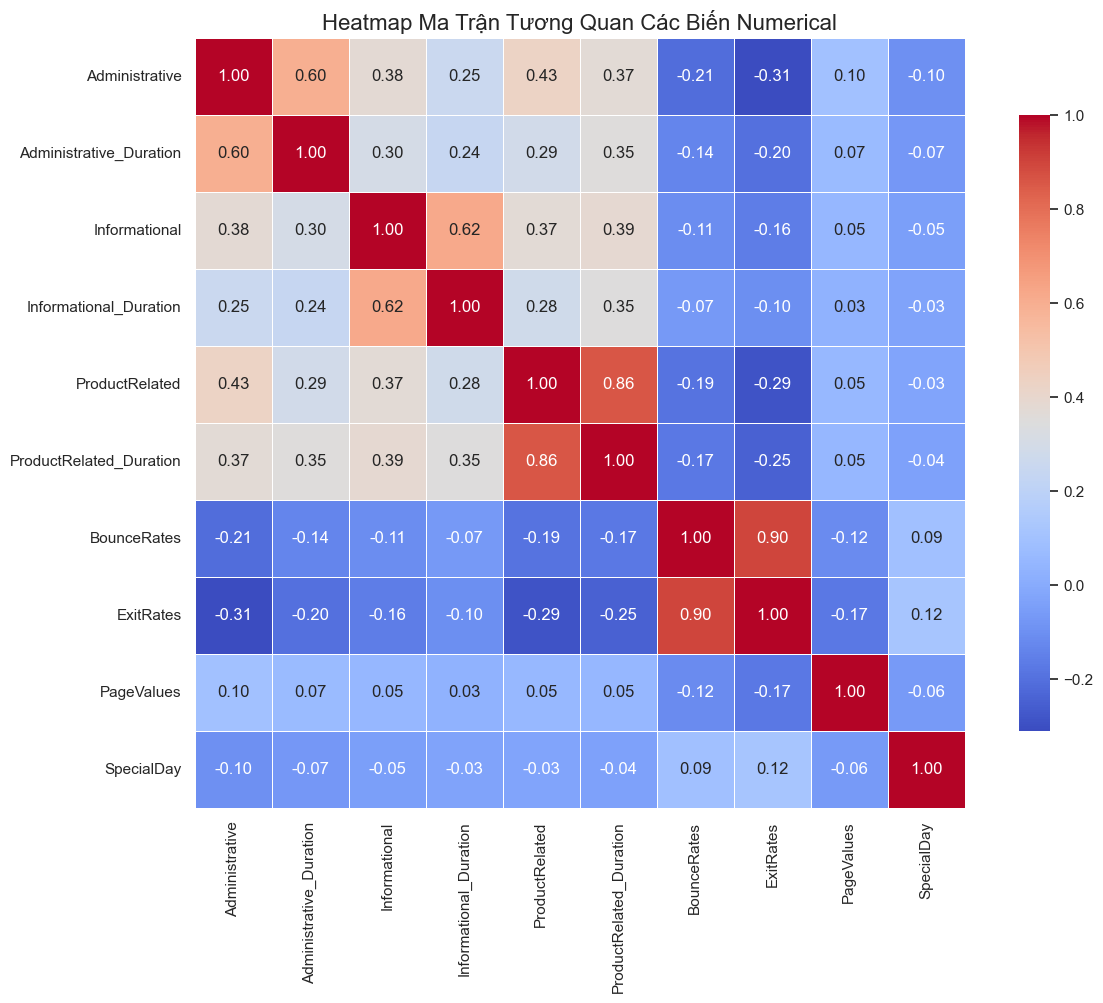

In [148]:
plt.figure(figsize=(14, 10))

sns.heatmap(
    corr_matrix,
    annot=True,            # hiển thị giá trị tương quan
    fmt=".2f",             # format số
    linewidths=0.5,         # đường phân cách các ô
    cmap="coolwarm",        # bảng màu dễ đọc
    square=True,            # ô vuông
    cbar_kws={"shrink": 0.8}  # thu nhỏ colorbar
)

plt.title("Heatmap Ma Trận Tương Quan Các Biến Numerical", fontsize=16)
plt.show()

<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Nhận xét về các mối quan hệ tương quan mạnh quan sát được
  </h5>
</div>

- Các cặp biến tương quan mạnh:
    - `Administrative` và `Administrative_Duration`
    - `Informational` và `Informational_Duration`
    - `ProductRelated` và `ProductRelated_Duration`
    - `BounceRates` và `ExitRates`
- 3 cặp biến về số trang xem và thời gian xem của loại trang đó (`Administrative` và `Administrative_Duration`, `Informational` và `Informational_Duration`, `ProductRelated` và `ProductRelated_Duration`) có tương quan mạnh vì trong cùng một phiên truy cập, số trang được xem càng nhiều thì tổng thời gian dành cho loại trang đó càng tăng. Đặc biệt, `ProductRelated` và `ProductRelated_Duration`có mối tương quan rất mạnh với hệ số tương quan xấp xỉ 0.86
- Hai biến `BounceRates` và `ExitRates` thể hiện mối tương quan rất mạnh vì cả hai đều mô tả hành vi người dùng rời khỏi phiên truy cập, mặc dù mỗi biến đo lường theo một góc độ khác nhau. Một trang có tỷ lệ bounce cao thường cũng là trang mà tỉ lệ người dùng rời phiên cao, khiến cả hai chỉ số tăng đồng thời.

<div style="
  margin: 18px 0 12px 0;
  padding: 6px 14px;
  border: 1px solid #dbeafe;
  border-radius: 8px;
  background-color: #f8fbff;
  display: inline-block;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Categorical x Categorical
  </h4>
</div>


Ở phần này, các cặp biến categorical quan trọng được thể hiện tương quan bằng bảng tần số, trực quan hóa bằng heatmap.

Các cặp biến được chọn:

* **Tất cả các cột khác $\times$ `Revenue`**
    * Xác định tỷ lệ chuyển đổi (`Revenue`) giữa các giá trị khác nhau của các thuộc tính phân loại.

* **`VisitorType` $\times$ `TrafficType`**
    * Phân tích Tương tác Kênh & Phân khúc: Kênh traffic nào thu hút Khách hàng Mới hiệu quả nhất và kênh nào giữ chân Khách hàng Quay lại.

* **`Month` $\times$ `VisitorType`**
    * Phân tích Thay đổi Khán giả theo Thời gian: Quan sát xem tỷ lệ Khách hàng Mới và Khách hàng Quay lại có biến động như thế nào giữa các tháng, giúp điều chỉnh mục tiêu tiếp thị theo mùa.


<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Tỉ lệ chuyển đổi của các biến Categorical
  </h5>
</div>

In [149]:
print("="*80)
print("BẢNG TỶ LỆ CHUYỂN ĐỔI")
print("="*80)

examine_cols = categorical_cols[:-1]

for col in examine_cols:
    print(f"\n{'='*20} {col.upper()} {'='*20}")
    
    # 1. Tính Tỷ lệ chuyển đổi (%) 
    rates = pd.crosstab(data[col], data['Revenue'], normalize='index') * 100
    rates.rename(columns={True: 'Conversion (%)', False: 'No Buy (%)'}, inplace=True)
    
    # 2. Tính Tổng số lượng thực tế (Total Count)
    counts = data[col].value_counts()
    counts.name = 'Total Count'
    
    # 3. Gộp lại
    result = pd.concat([counts, rates], axis=1)
    
    # 4. Sắp xếp & Chọn cột 
    final_table = result[['Total Count', 'Conversion (%)']].sort_values(
        by='Total Count', 
        ascending=False
    )
    
    # 5. Hiển thị bảng
    print(final_table)
    print("\n")

BẢNG TỶ LỆ CHUYỂN ĐỔI

==================== MONTH ====================
       Total Count  Conversion (%)
Month                             
May           3329       10.964254
Nov           2982       25.486251
Mar           1860       10.322581
Dec           1706       12.661196
Oct            549       20.947177
Sep            448       19.196429
Aug            433       17.551963
Jul            432       15.277778
June           285       10.175439
Feb            181        1.657459
Jan              0             NaN
Apr              0             NaN



==================== OPERATINGSYSTEMS ====================
                  Total Count  Conversion (%)
OperatingSystems                             
2                        6541       17.657850
1                        2549       14.868576
3                        2530       10.592885
4                         478       17.782427
8                          75       22.666667
6                          19       10.526316
7        

<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Mối quan hệ giữa các biến Categorical đặc biệt
  </h5>
</div>

Hàm `freq_table` để tính cross tabulations giữa 2 biến categorical và biểu diễn trực quan bằng heatmap

In [150]:
def freq_table(df, col1, col2, plot_heatmap=False):
    table = pd.crosstab(df[col1], df[col2])
    if plot_heatmap:
        plt.figure(figsize=(12,6))
        sns.heatmap(table, annot=True, fmt='d', linewidths=.5)
        plt.title(f"Heatmap: {col1} {col2}")
        plt.show()
    return table

Xét mối quan hệ giữa `VisitorType` với `Month` và `TrafficType`


Frequency Table: VisitorType and Month


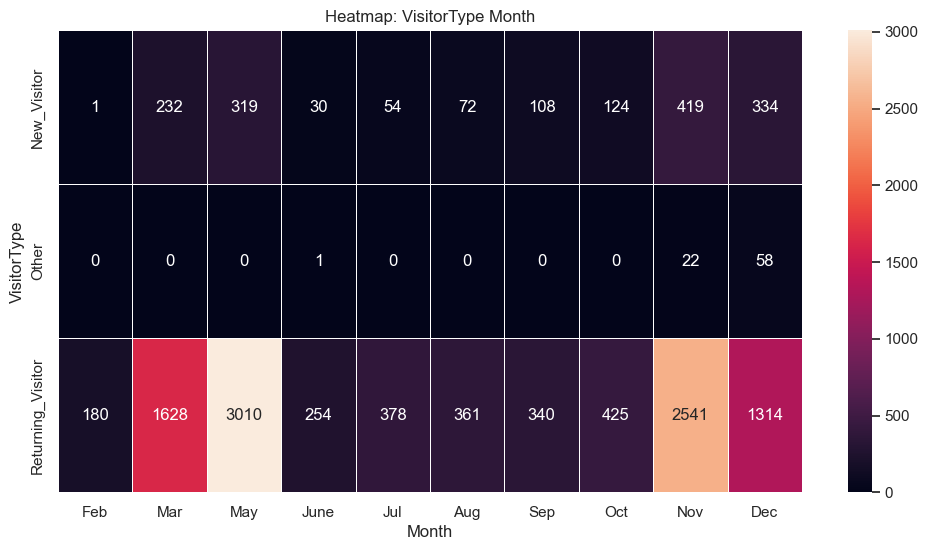


Frequency Table: VisitorType and TrafficType


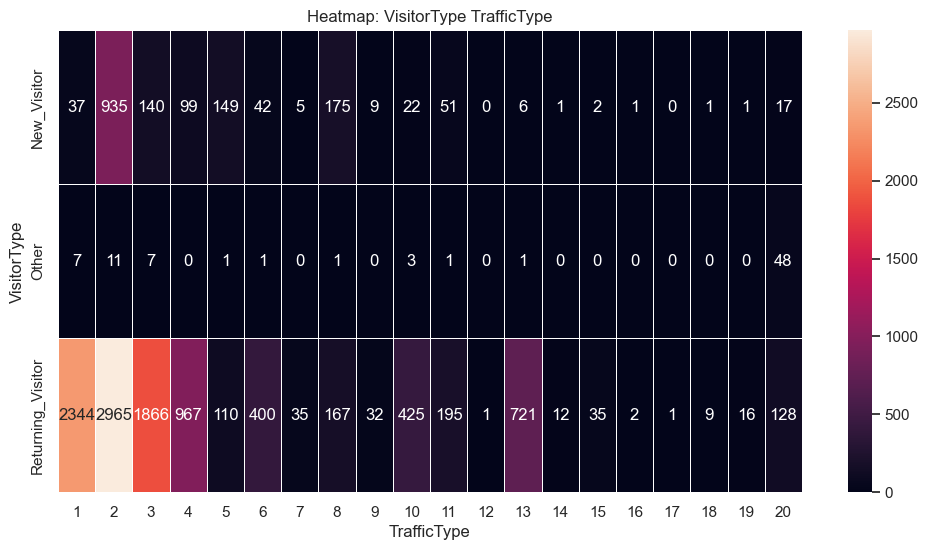

In [151]:
important_pairs = [
    ('VisitorType', 'Month'),
    ('VisitorType', 'TrafficType'),
]

# Tạo bảng tần suất + heatmap cho từng cặp
results = {}

for col1, col2 in important_pairs:
    print(f"\nFrequency Table: {col1} and {col2}")
    table = freq_table(data, col1, col2, plot_heatmap=True)
    results[f"{col1}_{col2}"] = table

<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Nhận xét
  </h5>
</div>

**Về tỉ lệ chuyển đổi:**
- **`VisitorType`**
  - `New_Visitor` có tỷ lệ chuyển đổi cao hơn `Returning_Visitor`.
  - `Returning_Visitor` chiếm phần lớn số lượng người dùng (10,431) nhưng tỷ lệ chuyển đổi chỉ đạt 14.09%.
  - `New_Visitor` có quy mô nhỏ hơn (1,693) nhưng đạt tỷ lệ chuyển đổi 24.93%.
  - Dữ liệu cho thấy sự khác biệt rõ rệt về hiệu suất chuyển đổi giữa hai nhóm, dù `Returning_Visitor` chiếm ưu thế về số lượng.

- **`Month`**
  - `Nov` là tháng có hiệu suất nổi bật nhất.
  - `Nov` vừa có lượng truy cập cao (2,982 – đứng thứ 2 trong năm) vừa có tỷ lệ chuyển đổi cao nhất (25.49%).
  - `May` ghi nhận lượng traffic cao nhất trong năm (3,329).
  - Tuy nhiên, tỷ lệ chuyển đổi của `May` chỉ đạt 10.96%, thấp hơn mức trung bình toàn bộ dữ liệu (~15%).
  - `Sep` và `Oct` có lượng traffic ở mức trung bình.
  - Hai tháng này ghi nhận tỷ lệ chuyển đổi tương đối cao (xấp xỉ 20%), cao hơn nhiều tháng khác.

- **`TrafficType`**
  - `TrafficType = 2` là nguồn truy cập có hiệu suất cao nhất.
  - Đây cũng là nguồn có lượng truy cập lớn nhất (3,911) với tỷ lệ chuyển đổi đạt 21.66%.
  - `TrafficType = 1` và `TrafficType = 3` mang lại lượng traffic lớn (tổng hơn 4,400 lượt).
  - Tuy nhiên, tỷ lệ chuyển đổi của hai nguồn này thấp hơn đáng kể (10.97% và 8.94%).
  - `TrafficType = 8` và `TrafficType = 20` có quy mô truy cập nhỏ hơn.
  - Dù vậy, hai nguồn này đạt tỷ lệ chuyển đổi cao (27.7% và 25.91%) trong phạm vi dữ liệu quan sát.

- **`Weekend`**
  - Tỷ lệ chuyển đổi vào `Weekend = True` đạt 17.45%.
  - Tỷ lệ chuyển đổi vào `Weekend = False` thấp hơn, ở mức 15.08%.
  - Lưu lượng truy cập vào ngày thường vẫn cao hơn so với cuối tuần.

- **`Region`**
  - Tỷ lệ chuyển đổi giữa các `Region` không có sự chênh lệch đáng kể.
  - Các giá trị chủ yếu dao động trong khoảng 14%–17%.

- **`Browser`**
  - `Browser = 2` là trình duyệt được sử dụng nhiều nhất và có tỷ lệ chuyển đổi ở mức ổn định (15.51%).
  - `Browser = 3` có hơn 100 người dùng nhưng tỷ lệ chuyển đổi thấp (4.76%).
  - `Browser = 12` và `Browser = 13` có tỷ lệ chuyển đổi cao (khoảng 30%), tuy nhiên, số lượng quan sát của hai trình duyệt này nhỏ nên mức độ đại diện không cao.

**Về mối quan hệ giữa các biến khác:**
- **`VisitorType × Month`**
  - `Returning_Visitor`:
    - Phân phối truy cập theo tháng tương tự phân phối tổng thể.
    - Lượng truy cập tập trung cao ở các tháng cao điểm như `May` và `Nov`.
  - `New_Visitor`:
    - Thể hiện xu hướng phân phối khác biệt so với tổng thể.
    - Lượng `New_Visitor` tăng rõ rệt vào các tháng cuối năm, đặc biệt là `Nov` và `Dec`.
    - Phân phối này cho thấy sự gia tăng tỷ trọng khách hàng mới trong giai đoạn cuối năm.

- **`VisitorType × TrafficType`**
  - `Returning_Visitor`:
    - Tập trung chủ yếu ở các kênh phổ biến (`TrafficType = 1, 2, 3, 4`).
    - Có sự hiện diện đáng kể ở một số kênh khác như `TrafficType = 6, 10, 13`.
  - `New_Visitor`:
    - Hầu như không xuất hiện ở `TrafficType = 1`.
    - Tập trung mạnh vào `TrafficType = 2`.
    - `TrafficType = 5` và `TrafficType = 8` có số lượng `New_Visitor` cao hơn `Returning_Visitor`.
    - Hai kênh này được xác định là các nguồn có hiệu quả cao trong việc thu hút khách hàng mới.




<div style="
  margin: 18px 0 12px 0;
  padding: 6px 14px;
  border: 1px solid #dbeafe;
  border-radius: 8px;
  background-color: #f8fbff;
  display: inline-block;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Numerical x Categorical
  </h4>
</div>


Việc so sánh các tham số thống kê cơ bản (như trung bình và trung vị) giữa hai nhóm khách hàng mua (`True`) và không mua (`False`) đóng vai trò quan trọng trong việc làm rõ sự khác biệt về hành vi người dùng. Thông qua việc đối chiếu các biến then chốt như `PageValues`, `ProductRelated_Duration`, `ExitRates`, `BounceRates` và `SpecialDay`, phân tích này tập trung xác định những đặc trưng hành vi nổi bật cũng như các ngưỡng giá trị có ảnh hưởng trực tiếp đến khả năng chuyển đổi. Kết quả thu được giúp làm nổi bật các tín hiệu có ý nghĩa để phân biệt rõ hai nhóm người dùng, từ đó nhận diện các yếu tố thúc đẩy quyết định mua hàng cũng như những nguyên nhân khiến khách hàng rời đi.

<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Grouped summary statistics
  </h5>
</div>

Hàm `grouped_stats` để tạo bảng thống kê cho mỗi cặp thuộc tính Numerical x Categorical

In [152]:
def grouped_stats(df, cat_col, num_col):
    """
    Tạo bảng thống kê nhóm cho numerical x categorical
    Gồm mean, median, std, min, max
    """
    table = df.groupby(cat_col, observed=False)[num_col].agg(
        ['mean', 'median', 'std', 'min', 'max']
    )
    return table

Xét tất cả các thuộc tính Numerical với Categorical

In [153]:
numerics = [
    'Administrative_Duration', 'Informational_Duration', 'PageValues', 
    'ProductRelated_Duration', 'BounceRates', 'SpecialDay'
]

for num in numerics:
    print(f"\n--- 'Revenue' vs '{num}' ---")
    display(grouped_stats(data, 'Revenue', num))



--- 'Revenue' vs 'Administrative_Duration' ---


,mean,median,std,min,max
Revenue,,,,,
False,74.635276,0.000000,171.858685,0.0,3398.75
True,119.483244,52.366667,201.114732,0.0,2086.75



--- 'Revenue' vs 'Informational_Duration' ---


,mean,median,std,min,max
Revenue,,,,,
False,30.603289,0.0,134.678026,0.0,2549.375000
True,57.611427,0.0,171.619131,0.0,1767.666667



--- 'Revenue' vs 'PageValues' ---


,mean,median,std,min,max
Revenue,,,,,
False,1.999985,0.000000,9.124701,0.0,246.758590
True,27.264518,16.758134,35.191954,0.0,361.763742



--- 'Revenue' vs 'ProductRelated_Duration' ---


,mean,median,std,min,max
Revenue,,,,,
False,1082.976881,526.00000,1810.834046,0.0,63973.52223
True,1876.209615,1109.90625,2312.214392,0.0,27009.85943



--- 'Revenue' vs 'BounceRates' ---


,mean,median,std,min,max
Revenue,,,,,
False,0.023197,0.003922,0.048466,0.0,0.2
True,0.005117,0.000000,0.012185,0.0,0.2



--- 'Revenue' vs 'SpecialDay' ---


,mean,median,std,min,max
Revenue,,,,,
False,0.069127,0.0,0.209996,0.0,1.0
True,0.023166,0.0,0.123521,0.0,1.0


<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Nhận xét
  </h5>
</div>

Dữ liệu cho thấy sự khác biệt rõ rệt về hành vi giữa hai nhóm Mua (`Revenue`=True) và Không mua (`Revenue`=False) thông qua các nhóm chỉ số chính.

- **`PageValues` và `ProductRelated_Duration`**

    - Phân phối của `PageValues` thể hiện sự phân hóa rất mạnh giữa hai nhóm. Phần lớn các phiên thuộc nhóm `Revenue`=False có giá trị `PageValues` bằng 0, trong khi nhóm `Revenue`=True có các giá trị cao hơn đáng kể.

    - Điều này cho thấy `PageValues` là biến phân biệt rõ ràng giữa hai nhóm, trong đó việc `PageValues` lớn hơn 0 thường chỉ xuất hiện ở các phiên có phát sinh mua hàng.
    - Bên cạnh đó, `ProductRelated_Duration` của nhóm `Revenue`=True cao hơn, phản ánh thời gian tương tác với các trang sản phẩm lớn hơn so với nhóm không mua.

- **Độ biến động của các biến thời gian**

    - Các biến thời gian (`Duration`) ở nhóm `Revenue`=True có độ lệch chuẩn lớn hơn đáng kể so với nhóm `Revenue`=False.

    - Điều này cho thấy hành vi của người mua phân tán hơn, với thời gian tương tác rất khác nhau giữa các phiên. Ngược lại, nhóm không mua có dữ liệu tập trung hơn, nhiều phiên có thời gian tương tác thấp hoặc bằng 0.

- **`ExitRates` và `BounceRates`**

    - Hai chỉ số `ExitRates` và `BounceRates` ở nhóm `Revenue`=True thấp hơn rõ rệt so với nhóm `Revenue`=False.

    - Sự khác biệt này cho thấy các phiên có mua hàng thường gắn liền với mức độ rời trang thấp hơn và ít phiên chỉ xem một trang duy nhất, trong khi nhóm không mua có xu hướng rời trang sớm hơn.

- **`SpecialDay`**

    - Giá trị trung bình của `SpecialDay` ở nhóm `Revenue`=False cao hơn so với nhóm `Revenue`=True.

    - Điều này phản ánh rằng trong các phiên không mua, chỉ số `SpecialDay` xuất hiện với tần suất hoặc mức độ cao hơn so với các phiên có mua hàng.

- **Hành vi tại các trang chức năng**

    - `Administrative_Duration` có sự khác biệt rõ rệt về trung vị. Nhóm `Revenue`=False có trung vị bằng 0, trong khi nhóm `Revenue`=True có thời gian dành cho nhóm trang này cao hơn.

    - `Informational_Duration` không thể hiện sự khác biệt đáng kể giữa hai nhóm, khi trung vị của cả `Revenue`=True và `Revenue`=False đều bằng 0.

<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        VII. Tổng kết
    </h3>
</div>

<div style="
  margin: 18px 0 12px 0;
  padding: 6px 14px;
  border: 1px solid #dbeafe;
  border-radius: 8px;
  background-color: #f8fbff;
  display: inline-block;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    1. Tổng quan
  </h4>
</div>


<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Các Insights quan trọng và các patterns dẫn đến câu hỏi
  </h5>
</div>

**1. Numerical Patterns: Mối tương quan và sự phân hóa giá trị**

Các biến Numerical cho thấy mối liên hệ chặt chẽ và khả năng phân biệt rõ ràng giữa các phiên mua và không mua:

* **Mối tương quan mạnh:** Tồn tại mối quan hệ tuyến tính rõ rệt giữa số lượng trang xem và thời gian tương ứng (`Administrative`, `Informational`, `ProductRelated`). Đặc biệt, `ProductRelated` và `ProductRelated_Duration` có hệ số tương quan rất cao (~0.86), cho thấy khi người dùng quan tâm đến sản phẩm, họ có xu hướng dành nhiều thời gian tìm hiểu thay vì chỉ lướt qua.
* **Sự phân hóa của `PageValues` (Zero-value phenomenon):** Đây là phát hiện quan trọng. Biến `PageValues` thể hiện sự phân hóa gần như nhị phân: nhóm không mua hàng (`Revenue` = False) hầu hết có giá trị bằng 0, trong khi nhóm mua hàng (`Revenue` = True) có giá trị cao vượt trội. Điều này cho thấy `PageValues` > 0 có thể được xem là một ngưỡng quan trọng để dự báo khả năng chuyển đổi.
* **Chất lượng phiên truy cập:** Nhóm mua hàng có tỷ lệ thoát (`ExitRates`) và tỷ lệ bỏ trang (`BounceRates`) thấp hơn đáng kể, đồng thời thể hiện mức độ tương tác rõ ràng tại các trang quản trị (`Administrative_Duration` > 0). Ngược lại, nhóm không mua thường có giá trị trung vị bằng 0 ở các trang này.

**2. Nghịch lý giữa lưu lượng và hiệu suất (Traffic vs. Conversion)**

Phân tích các biến Categorical cho thấy lưu lượng truy cập cao không đồng nghĩa với hiệu quả kinh doanh cao, tạo ra một số nghịch lý đáng chú ý:

* **Hiệu ứng “Tháng 5 rỗng” và “Tháng 11 vàng”:** Tháng 5 ghi nhận lượng truy cập cao nhất trong năm nhưng tỷ lệ chuyển đổi lại rất thấp (10.96%), cho thấy chất lượng traffic chưa cao hoặc chưa đúng đối tượng. Ngược lại, tháng 11 đạt trạng thái tối ưu với lượng truy cập cao thứ hai và tỷ lệ chuyển đổi cao nhất (25.49%), phản ánh hiệu quả rõ rệt của mùa mua sắm cuối năm.
* **Phân hóa theo kênh truy cập:**
* `TrafficType` 2 là kênh hiệu quả nhất, vừa có lưu lượng cao vừa có tỷ lệ chuyển đổi trên 21%.
* `TrafficType` 1 và 3 là các kênh kém hiệu quả khi mang lại lượng truy cập lớn nhưng tỷ lệ chuyển đổi thấp (dưới 11%).
* `TrafficType` 8 và 20 là các kênh ngách tiềm năng với tỷ lệ chuyển đổi rất cao (trên 25%) dù quy mô còn nhỏ.

**3. Sự khác biệt trong hành trình khách hàng (Segmentation patterns)**

Hành vi giữa khách hàng mới và khách hàng quay lại có sự khác biệt rõ rệt, gợi ý nhu cầu xây dựng các chiến lược tiếp cận riêng:

* **Hiệu suất đối lập:** `Returning_Visitor` chiếm phần lớn lưu lượng truy cập nhưng có tỷ lệ chuyển đổi thấp (14.09%), trong khi `New_Visitor` tuy chiếm tỷ trọng nhỏ hơn nhưng lại có tỷ lệ chuyển đổi cao hơn đáng kể (24.93%).
* **Sự khác biệt về điểm chạm (Touchpoints):**
* `Returning_Visitor` chủ yếu tập trung vào các kênh phổ biến (`TrafficType` 1, 2, 3) và phân bố tương đối đồng đều theo thời gian. Trong đó, `TrafficType` 1 (Direct/Search) có xu hướng mang tính hành vi quen thuộc của nhóm này.
* `New_Visitor` thể hiện hành vi đặc thù hơn, tập trung mạnh vào giai đoạn cuối năm (tháng 11, 12) và xuất hiện nhiều tại các kênh ngách như `TrafficType` 5 và 8, nơi số lượng khách mới thậm chí vượt khách quay lại.

**4. Hiện tượng “window shopping” trong mùa lễ**

Giá trị trung bình của biến `SpecialDay` ở nhóm không mua (`Revenue` = False) lại cao hơn nhóm mua (`Revenue` = True). Điều này gợi ý một mẫu hình hành vi đáng chú ý: người dùng có xu hướng truy cập để tham khảo sản phẩm và so sánh giá nhiều hơn vào các dịp gần lễ, nhưng hành vi mua thực tế không diễn ra ngay, dẫn đến tình trạng lượng truy cập cao nhưng tỷ lệ chuyển đổi thấp.

<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Các vấn đề chất lượng dữ liệu được phát hiện và các bước tiền xử lý cần thực hiện
  </h5>
</div>

**Các cột numerical**

**Các cột categorical**

<div style="
  margin: 18px 0 12px 0;
  padding: 6px 14px;
  border: 1px solid #dbeafe;
  border-radius: 8px;
  background-color: #f8fbff;
  display: inline-block;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    2. Red flags cần lưu ý (là tổng hợp cả numerical & categorical, thứ 5 làm nhma làm trước oke luôn)
  </h4>
</div>

- Liệt kê các vấn đề chất lượng dữ liệu nghiêm trọng  
- Ghi chú các hạn chế có thể ảnh hưởng đến phân tích

### Phần Ngọc Hân viết lại cho bước tiền xử lý ở trên

| Vấn đề | Gợi ý xử lý |
| :--- | :--- |
| **Mất cân bằng dữ liệu** | Dữ liệu `VisitorType` và `Browser` bị lệch nghiêm trọng. Cần sử dụng kỹ thuật **Resampling** (SMOTE, Undersampling) hoặc dùng **Class Weights** khi train model. |
| **Nhiều giá trị đơn lẻ** | Với `TrafficType` hoặc `Browser` (các giá trị đuôi dài), nên gom nhóm các giá trị ít xuất hiện thành nhóm `Other` để giảm nhiễu. |
| **Feature Engineering** | Kiểm tra tương quan (Correlation) giữa `OS` và `Browser` để tránh đa cộng tuyến (Multicollinearity). |

1.  **Gom nhóm (Binning):** Với `TrafficType` (20 loại) và `Browser` (13 loại), các giá trị có tần suất thấp nên được gom thành nhóm "Other" để giảm nhiễu.
2.  **Kiểm tra tính mùa vụ:** Vì cột `Month` bị thiếu 2 tháng và tháng `May` chiếm tới 27%, cần xem xét kỹ nếu bài toán liên quan đến dự báo chuỗi thời gian (Time Series).
3.  **Encoding:**
    * `Weekend`: Dùng Label Encoding (0/1).
    * `VisitorType`, `Region`: Có thể dùng One-Hot Encoding (vì số lượng unique ít).
    * `TrafficType`, `Month`: Cân nhắc Target Encoding hoặc Frequency Encoding nếu dùng mô hình cây (Tree-based).


##### 4. Khuyến nghị Xử lý

Có 2 phương án xử lý gọn gàng cho trường hợp này:

* **Phương án A:** Xóa bỏ (Dropping) 
Vì tổng số dòng bị ảnh hưởng chỉ là **6 dòng** (1 ở Browser + 5 ở TrafficType) trên tổng số hàng nghìn dữ liệu, việc xóa các dòng này không ảnh hưởng đến phân phối chung.
> *Hành động: Lọc bỏ các dòng chứa `Browser == 9` và `TrafficType thuộc {12, 16, 17}`.*


<div style="
    margin-top: 20px;
    margin-bottom: 10px;
    padding-bottom: 5px;
    border-bottom: 4px solid #007bff; /* Thanh ngang màu xanh */
">
    <h2 style="color: #007bff; margin: 0; padding: 0;">
        C. ĐẶT CÁC BÀI TOÁN TRÊN TẬP DỮ LIỆU VÀ GIẢI QUYẾT
    </h2>
</div>

<div style="
    /* Tối ưu hóa hiển thị trên mọi kích thước màn hình */
    box-sizing: border-box; 
    max-width: 100%; /* Đảm bảo không vượt quá chiều rộng của Notebook */
    overflow-x: hidden; /* Ngăn thanh cuộn ngang xuất hiện */
    
    /* Định dạng thẩm mỹ */
    border: 3px solid #ff9900;
    border-radius: 15px;
    padding: 20px;
    margin: 25px 0;
    background-color: #fffaf0;
    box-shadow: 4px 4px 10px rgba(0, 0, 0, 0.15);
">
    <p style="text-align: justify; line-height: 1.5; margin: 0;">
        Dựa trên các kết quả phân tích dữ liệu ban đầu, mục này tập trung **xây dựng các câu hỏi nghiên cứu** nhằm làm rõ những xu hướng hành vi và điểm bất thường đã quan sát được, đặc biệt là sự chênh lệch giữa lượng truy cập và tỷ lệ chuyển đổi. Các câu hỏi hướng đến việc phân tích chất lượng nguồn truy cập, hành vi “xem nhưng không mua”, các chỉ số dự báo hiệu quả chuyển đổi như PageValues, cũng như sự khác biệt giữa khách hàng mới và khách hàng quay lại dưới tác động của yếu tố mùa vụ và các điểm chạm chính. Kết quả của phần này sẽ là cơ sở để đề xuất các chiến lược tối ưu hóa hiệu quả kinh doanh ở phần kết luận.
    </p>
</div>

---

## Mỗi câu hỏi làm theo định dạng (Gemini dịch từ file doc của thầy)

Trong notebook của bạn, hãy trình bày mỗi câu hỏi theo cấu trúc sau:

### 1. Câu hỏi (The Question)
* Nêu rõ câu hỏi nghiên cứu của bạn một cách cụ thể và rõ ràng.
* Đảm bảo câu hỏi đủ chính xác để có thể trả lời được bằng dữ liệu bạn đang có.

### 2. Động lực & Lợi ích (Motivation & Benefits)
* Tại sao câu hỏi này đáng để nghiên cứu/điều tra?
* Việc trả lời câu hỏi này sẽ mang lại những lợi ích hoặc thông tin chi tiết (insights) gì?
* Ai sẽ quan tâm đến câu trả lời này? (các bên liên quan, người ra quyết định, nhà nghiên cứu, v.v.)
* Nó giúp giải quyết vấn đề thực tế nào hoặc hỗ trợ cho quyết định nào?

---

### A. Tiền xử lý (nếu cần)

**Giải thích bằng văn bản (Markdown):**
* Mô tả các bước tiền xử lý rõ ràng bằng Markdown.
* Phác thảo quy trình làm việc để người đọc có thể hiểu mà không cần đọc code.
* Giải thích logic và lý do đằng sau mỗi bước thực hiện.
* Sử dụng các bước đánh số hoặc gạch đầu dòng.

**Triển khai Code:**
* Thực hiện từng bước với code sạch, dễ đọc.
* Sử dụng tên biến có ý nghĩa.
* Thêm chú thích cho các đoạn logic phức tạp (giải thích **TẠI SAO**, không chỉ là LÀM GÌ).
* Giữ các dòng code ngắn gọn (< 100 ký tự; ngắt các chuỗi lệnh dài xuống dòng).
* Hiển thị các kết quả trung gian khi hữu ích.

### B. Phân tích

**Giải thích bằng văn bản (Markdown):**
* Mô tả phương pháp phân tích của bạn trong Markdown.
* Giải thích các phương pháp bạn sẽ sử dụng và lý do tại sao chọn chúng.
* Phác thảo các kết quả đầu ra mong đợi (số liệu thống kê, biểu đồ trực quan hóa, mô hình).
* Viết sao cho người đọc hiểu được phương pháp luận mà không cần phải đọc code.

**Triển khai Code:**
* Thực hiện phân tích tuân thủ các tiêu chuẩn chất lượng code:
    * Tên biến có ý nghĩa.
    * Chú thích đúng trọng tâm/chiến lược.
    * Dòng code ngắn gọn, dễ đọc.
    * Gắn nhãn

### C. Kết quả & Diễn giải

**Trực quan hóa:**
* Tạo ít nhất 2 biểu đồ liên quan, được dán nhãn kỹ lưỡng cho mỗi câu hỏi.
* Có tiêu đề, nhãn trục, chú giải (legend) và đơn vị đo lường chính xác.

**Phân tích bằng văn bản:**
* Trả lời câu hỏi một cách rõ ràng kèm theo bằng chứng cụ thể.
* Trích dẫn các con số, thống kê và xu hướng (patterns) cụ thể từ phân tích của bạn.
* Thảo luận về ý nghĩa thực tiễn và các tác động/hệ quả của kết quả.
* Ghi chú những điều bất ngờ hoặc các phát hiện ngoài dự kiến.
* Thừa nhận các hạn chế/giới hạn của phân tích.

<div style="
  margin: 28px 0 20px 0;
  padding: 14px 18px;
  border-left: 6px solid #2563eb;
  background-color: #eff6ff;
  border-radius: 6px;
  max-width: 90%;
">
  <h2 style="
    margin: 0;
    font-weight: 700;
    color: #1e3a8a;
  ">
    1. Mỗi nguồn traffic đóng góp như thế nào vào doanh thu, tương tác, ý định mua và thu hút khách mới trong toàn bộ funnel marketing?
  </h2>
</div>



<div style="margin: 26px 0 18px 0;">
  <h3 style="
    margin: 0;
    font-weight: 700;
    padding-bottom: 6px;
    border-bottom: 3px solid #e5e7eb;
  ">
    I. Mục tiêu phân tích
  </h3>
</div>


Thay vì chỉ đánh giá hiệu quả nguồn traffic dựa trên tỷ lệ chuyển đổi hoặc doanh thu cuối cùng, phân tích này xem xét các nguồn truy cập dưới nhiều góc độ khác nhau. Cụ thể, mỗi kênh sẽ được đánh giá dựa trên 4 nhóm giá trị chính:

* **Đóng góp doanh thu:** Nguồn nào tạo ra doanh thu thực tế?
* **Mức độ tương tác:** Nguồn nào giữ chân người dùng lâu, đặc biệt trên các trang sản phẩm?
* **Mức độ tiến gần đến hành động mua:** Nguồn nào thường dẫn người dùng đến các bước gần thanh toán?
* **Khả năng thu hút khách mới:** Nguồn nào mang lại tỷ lệ người dùng mới cao?

<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Vì sao cần phân tích vấn đề này?
  </h4>
</div>


Việc đánh giá hiệu quả traffic chỉ dựa trên số lượt truy cập hoặc doanh thu thường dẫn đến sai lệch trong phân bổ ngân sách. Một số kênh không tạo ra đơn hàng ngay lập tức nhưng lại đóng vai trò quan trọng trong việc giúp người dùng hiểu sản phẩm hoặc mở rộng tệp khách hàng mới.

Nếu không xem xét thêm các yếu tố như mức độ tương tác hay ý định mua, doanh nghiệp có thể vô tình cắt giảm ngân sách của những kênh đang hỗ trợ giai đoạn đầu của marketing.

<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Phân tích này mang lại insight gì?
  </h4>
</div>


Kết quả giúp xác định đúng vai trò của từng nguồn traffic, thay vì yêu cầu tất cả các kênh đều phải tạo ra đơn hàng trực tiếp.

* **Nhóm kênh cung cấp thông tin:** Người dùng dành nhiều thời gian tìm hiểu sản phẩm.
* **Nhóm kênh tiềm năng cao nhưng chưa chuyển đổi:** Người dùng đi sâu vào các bước mua nhưng chưa hoàn tất.
* **Nhóm kênh thu hút khách mới:** Mang lại nhiều người dùng lần đầu.
* **Nhóm kênh kém hiệu quả:** Mức độ tương tác và hành động đều thấp.

<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Ai cần quan tâm đến kết quả này?
  </h4>
</div>

* Quản lý Marketing: để phân bổ ngân sách hợp lý giữa các kênh.
* Nhân sự chạy quảng cáo: để tối ưu chiến dịch và thông điệp.
* Nhân sự nội dung: để hiểu rõ nguồn traffic nào phù hợp với nội dung chuyên sâu.

<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Phân tích này hỗ trợ quyết định gì?
  </h4>
</div>

* Giảm ngân sách cho các nguồn traffic kém hiệu quả.
* Duy trì hoặc đầu tư thêm cho các kênh chưa ra đơn nhưng có mức độ tương tác tốt.
* Điều chỉnh thông điệp theo đặc điểm người dùng của từng nguồn.

<div style="margin: 26px 0 18px 0;">
  <h3 style="
    margin: 0;
    font-weight: 700;
    padding-bottom: 6px;
    border-bottom: 3px solid #e5e7eb;
  ">
    II. Giải quyết câu hỏi
  </h3>
</div>


<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    a. Tiền xử lý
  </h4>
</div>

Mục tiêu của giai đoạn tiền xử lý là chuyển đổi dữ liệu hành vi ở cấp độ phiên truy cập thành các chỉ số và nhóm thông tin có ý nghĩa, phục vụ cho việc đánh giá vai trò của từng nguồn traffic trong marketing.

Quy trình tiền xử lý gồm các bước chính sau:

1. **Phân loại hành vi của từng phiên truy cập**

   * Mỗi phiên được gán vào một nhóm hành vi đại diện cho mức độ chất lượng và ý định mua của người dùng.
   * Việc phân loại này giúp phân biệt rõ giữa traffic có giá trị thấp, traffic đang trong giai đoạn tìm hiểu và traffic đã tiến gần đến chuyển đổi.
   * Các nhóm hành vi được xây dựng dựa trên thời gian truy cập, mức độ tương tác với nội dung sản phẩm và trạng thái chuyển đổi.

2. **Xác định các nhóm hành vi chính**

   * Nhóm có chất lượng thấp: người dùng rời trang nhanh hoặc gần như không tương tác.
   * Nhóm có quan tâm: chưa phát sinh doanh thu nhưng dành nhiều thời gian xem nội dung liên quan đến sản phẩm.
   * Nhóm có ý định mua cao: chưa hoàn tất đơn hàng nhưng đã tiếp cận các bước liên quan đến tài khoản hoặc thanh toán.
   * Nhóm chuyển đổi: có phát sinh doanh thu.
   * Các phiên còn lại được xếp vào nhóm trung tính để tránh làm nhiễu các phân tích chính.

3. **Tổng hợp dữ liệu theo nguồn truy cập**

   * Sau khi phân loại hành vi, dữ liệu được tổng hợp ở cấp độ nguồn traffic.
   * Mỗi nguồn truy cập được mô tả thông qua bốn chỉ số nền tảng: quy mô traffic, khả năng tạo chuyển đổi, mức độ tương tác với sản phẩm và khả năng thu hút người dùng mới.
   * Các chỉ số này đóng vai trò là đầu vào cho toàn bộ giai đoạn phân tích và trực quan hóa phía sau.



In [198]:
# Bước 1: Phân loại và dán nhãn hành vi

# 1. Tính toán các ngưỡng (Thresholds) để phân loại
avg_bounce_rate = data['BounceRates'].mean()
top_duration_threshold = data['ProductRelated_Duration'].quantile(0.75) # Top 25% thời gian xem
min_duration_threshold = 5 

# 2. Hàm định nghĩa quy tắc gán nhãn
def label_traffic(row):
    # Ưu tiên 1: Đã mua hàng 
    if row['Revenue']:
        return 'Đã mua'
    
    # Ưu tiên 2: Suýt mua - Đã vào trang Admin và xem sản phẩm nhưng chưa mua
    if (row['Administrative'] > 0) and (row['ProductRelated'] > 0):
        return 'Ý định mua cao'
    
    # Ưu tiên 3: Quan tâm - Xem sản phẩm rất lâu (Top 25%)
    if row['ProductRelated_Duration'] >= top_duration_threshold:
        return 'Quan tâm'
    
    # Ưu tiên 4: Chất lượng thấp - Bounce cao hoặc thoát quá nhanh
    if (row['BounceRates'] > avg_bounce_rate) or (row['ProductRelated_Duration'] < min_duration_threshold):
        return 'Thấp'
    
    # Còn lại: Normal
    return 'Trung bình'

# 3. Áp dụng hàm vào DataFrame
data['Traffic_Label'] = data.apply(label_traffic, axis=1)

In [208]:
# Bước 2: Tạo bảng thống kê các chỉ số của mỗi kênh

# Tạo cột phụ để tính toán tỉ lệ khách mới
data['Is_New_Visitor'] = (data['VisitorType'] == 'New_Visitor').astype(int)

# Groupby theo TrafficType để tính 4 chỉ số 
scorecard = data.groupby('TrafficType').agg({
    'Administrative': 'count',            # 1. Lượng truy cập
    'Revenue': 'mean',                     # 2. Tỉ lệ chuyển đổi
    'ProductRelated_Duration': 'mean',     # 3. Mức độ tương tác
    'Is_New_Visitor': 'mean'               # 4. Tỉ lệ khách hàng mới
}).reset_index()

# Đổi tên cột 
scorecard.columns = ['TrafficType', 'Lượng truy cập', 'Tỉ lệ chuyển đổi', 'Mức độ tương tác', 'Tỉ lệ KH mới']

# Hiển thị bảng thống kê để kiểm tra
print("Bảng điểm Kênh:")
print(scorecard)

Bảng điểm Kênh:
    TrafficType  Lượng truy cập  Tỉ lệ chuyển đổi  Mức độ tương tác  \
0             1            2388          0.109715       1266.590355   
1             2            3911          0.216569       1458.687197   
2             3            2013          0.089419        910.054062   
3             4            1066          0.154784        991.727643   
4             5             260          0.215385        742.331026   
5             6             443          0.119639       1142.992309   
6             7              40          0.300000       1035.012620   
7             8             343          0.276968       1084.488987   
8             9              41          0.097561        555.006219   
9            10             450          0.200000       1258.305854   
10           11             247          0.190283        899.127394   
11           12               1          0.000000         15.000000   
12           13             728          0.059066       1284.

<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    b. Phân tích
  </h4>
</div>

Giai đoạn phân tích sử dụng các chỉ số đã được chuẩn hóa để đánh giá hiệu quả và vai trò của từng nguồn truy cập thông qua nhiều góc nhìn bổ sung lẫn nhau.

Phương pháp phân tích được triển khai theo ba hướng chính:

1. **Phân tích cấu trúc chất lượng traffic**

   * Mỗi nguồn truy cập được phân tích dựa trên tỷ trọng các nhóm hành vi đã xác định ở giai đoạn tiền xử lý.
   * Phương pháp này giúp trả lời câu hỏi về bản chất traffic mà một kênh mang lại, thay vì chỉ nhìn vào kết quả chuyển đổi cuối cùng.
   * Kết quả đầu ra mong đợi là các biểu đồ thể hiện sự khác biệt về cấu trúc chất lượng giữa các nguồn truy cập.
   * Phân tích tập trung vào việc so sánh tỷ lệ phiên có chất lượng thấp và tỷ lệ phiên có ý định mua cao trong từng kênh.

2. **Phân tích hiệu quả tài chính theo quy mô traffic**

   * Các nguồn truy cập được so sánh dựa trên mối quan hệ giữa quy mô traffic và tỷ lệ chuyển đổi.
   * Cách tiếp cận này giúp xác định các kênh mang lại giá trị tài chính rõ rệt, cũng như các kênh có lưu lượng lớn nhưng hiệu quả chuyển đổi chưa tương xứng.
   * Kết quả đầu ra là các biểu đồ cho thấy vị trí tương đối của từng kênh trong bức tranh tổng thể về hiệu quả kinh doanh.

3. **Phân tích vai trò của nguồn truy cập trong hành trình khách hàng**

   * Các nguồn traffic tiếp tục được đánh giá dựa trên khả năng thu hút người dùng mới và mức độ người dùng dành thời gian tìm hiểu sản phẩm.
   * Phân tích này cho phép phân biệt các kênh thiên về mở rộng tệp khách hàng với các kênh thiên về duy trì và nuôi dưỡng người dùng hiện có.
   * Kết quả giúp diễn giải đúng vai trò của các kênh có tỷ lệ chuyển đổi thấp nhưng mức độ tương tác cao, trong bối cảnh toàn bộ hành trình marketing.

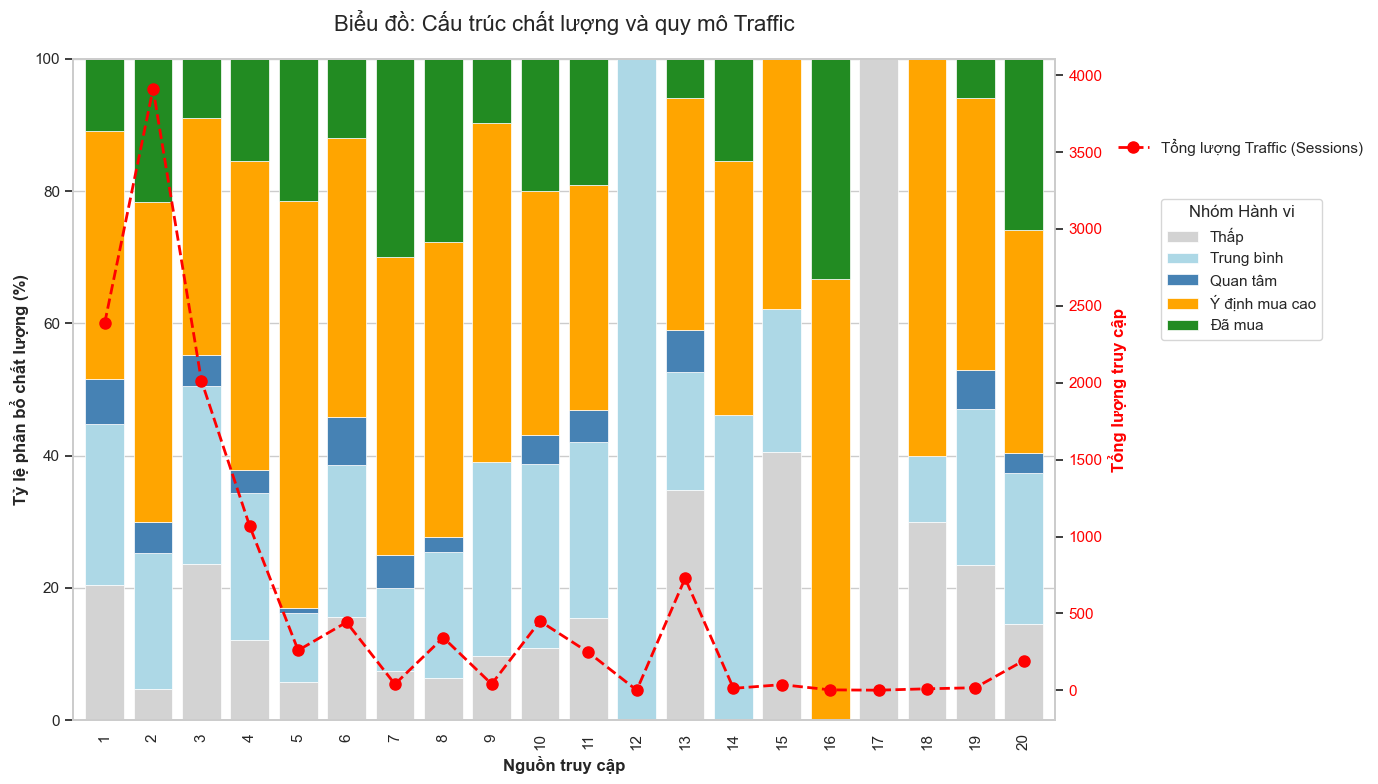

In [200]:
# PHÂN TÍCH CẤU TRÚC LƯỢNG TRAFFIC

# Tạo bảng pivot tỷ lệ % các nhãn hành vi
quality_pivot = pd.crosstab(data['TrafficType'], data['Traffic_Label'], normalize='index') * 100

# Sắp xếp lại thứ tự cột cho logic 
column_order = ['Thấp', 'Trung bình', 'Quan tâm', 'Ý định mua cao', 'Đã mua']
quality_pivot = quality_pivot.reindex(columns=column_order)

volume_series = scorecard['Lượng truy cập']

# Vẽ biểu đồ

fig, ax1 = plt.subplots(figsize=(14, 8))

# 1. Vẽ biểu đồ cột chồng  ở trục trái 
colors = ['#d3d3d3', '#add8e6', '#4682b4', '#ffa500', '#228b22'] # Xám, Xanh nhạt, Xanh đậm, Cam, Xanh lá
quality_pivot.plot(kind='bar', stacked=True, color=colors, ax=ax1, width=0.8, edgecolor='white', linewidth=0.5)

ax1.set_ylabel('Tỷ lệ phân bổ chất lượng (%)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Nguồn truy cập', fontsize=12, fontweight='bold')
ax1.set_ylim(0, 100)

ax1.legend(title='Nhóm Hành vi', bbox_to_anchor=(1.1, 0.8), loc='upper left')

# 2. Vẽ biểu đồ đường ở trục phải
ax2 = ax1.twinx()

ax2.plot(ax1.get_xticks(), volume_series, color='red', marker='o', 
         linestyle='--', linewidth=2, markersize=8, label='Tổng lượng Traffic (Sessions)')

# Định dạng Trục phải (Số lượng)
ax2.set_ylabel('Tổng lượng truy cập', fontsize=12, fontweight='bold', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.grid(False) 
ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 0.9), frameon=False)

# 3. Thêm title
plt.title('Biểu đồ: Cấu trúc chất lượng và quy mô Traffic', fontsize=16, pad=20)

plt.tight_layout()
plt.show()

<div style="
  margin: 12px 0 16px 0;
  padding: 10px 14px;
  border-left: 3px solid #d1d5db;
  background-color: #f9fafb;
  border-radius: 6px;
">
  <strong>Nhận xét về hành vi mua hàng:</strong>
</div>


Dữ liệu cho thấy tín hiệu khá tích cực khi nhóm người dùng có **ý định mua cao** chiếm tỷ trọng lớn ở hầu hết các kênh Điều này cho thấy nguồn traffic hiện tại chủ yếu mang về người dùng có nhu cầu thật, không chỉ là truy cập ngẫu nhiên. Tuy nhiên, một vài kênh có xu hướng khác biệt là kênh 12 có người dùng chủ yếu ở mức ý định mua trung bình và kênh 17 và 18 phần lớn là ý định mua thấp, gần như không có đóng góp cho chuyển đổi. Tuy nhiên 3 kênh này đều có lượng truy cập quá thấp nên không quan trọng.

* **Nhóm có lượng truy cập lớn nhất: Traffic Type 2, 1, 3**

  * Đây là ba kênh có lượng truy cập cao nhất, giữ vai trò chính trong tổng lưu lượng của website.
  * Traffic Type 2:

    * Có lượng truy cập cao nhất, đồng thời giữ được tỷ lệ chuyển đổi tốt.
    * Tỷ lệ traffic chất lượng thấp rất thấp, cho thấy khả năng tiếp cận đúng đối tượng.
  * Traffic Type 1 và Traffic Type 3:

    * Vẫn đóng góp đáng kể vào số đơn hàng.
    * Tuy nhiên, tỷ lệ traffic chất lượng thấp khá cao, cho thấy còn tồn tại sự lãng phí về nguồn lực.

* **Nhóm tầm trung: Traffic Type 4 và 13**

  * Hai kênh có quy mô gần tương đương nhưng hiệu quả khác nhau rõ rệt.
  * Traffic Type 4:

    * Tỷ lệ chuyển đổi cao hơn đáng kể.
    * Dù còn traffic chất lượng thấp, hiệu quả bán hàng vẫn đủ để bù đắp.
  * Traffic Type 13:

    * Lượng truy cập ở mức khá nhưng tỷ lệ chuyển đổi rất thấp.
    * Traffic chất lượng thấp chiếm tỷ lệ cao, cho thấy kênh này chưa tiếp cận đúng nhóm người dùng phù hợp.

* **Nhóm quy mô trung bình: Traffic Type 5, 6, 8, 10, 11, 20**

  * Các kênh này không có lượng truy cập quá lớn nhưng nhìn chung có chất lượng traffic tốt.
  * Traffic Type 5, 8 và 20:

    * Có tỷ lệ chuyển đổi cao và ít traffic chất lượng thấp.
    * Trong đó, Traffic Type 8 nổi bật với quy mô và hiệu quả tốt nhất trong nhóm.
  * Traffic Type 6, 10 và 11:

    * Hiệu suất tương đối ổn định.
    * Đóng góp đều vào doanh thu chung mà không gây nhiều vấn đề về chất lượng traffic.

* **Nhóm quy mô rất nhỏ**

  * Bao gồm các kênh còn lại với lượng truy cập dưới 50 phiên.
  * Do quy mô quá nhỏ, các chỉ số dễ biến động mạnh và không đủ độ tin cậy để rút ra xu hướng chung.


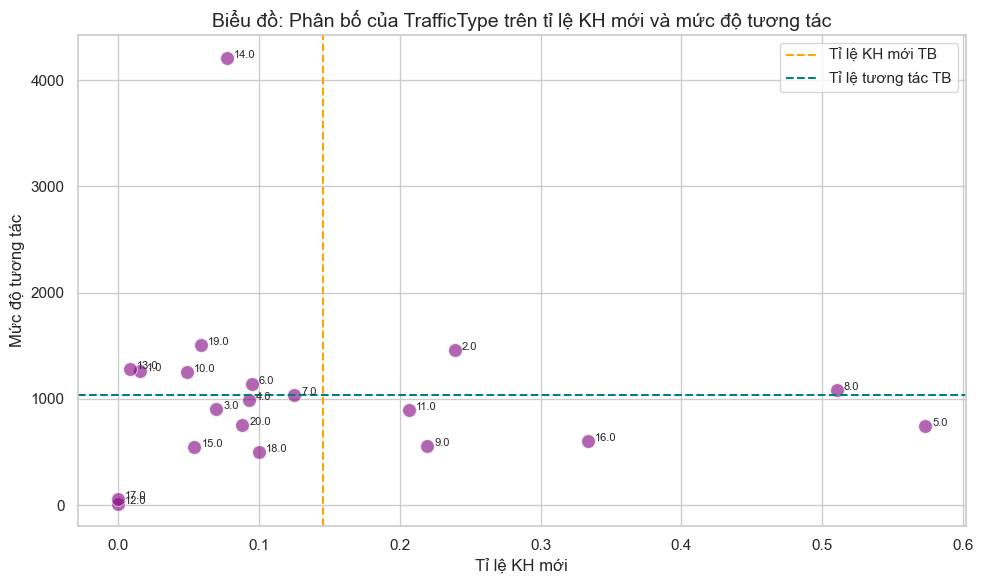

In [207]:
# Phân tích vai trò của nguồn truy cập trong hành trình khách hàng

plt.figure(figsize=(10, 6))
sns.scatterplot(data=scorecard, x='Tỉ lệ KH mới', y='Mức độ tương tác', s=100, color='purple', alpha=0.6)

# Gắn nhãn tên TrafficType
for _, row in scorecard.iterrows():
    plt.text(
        row['Tỉ lệ KH mới'] + 0.005,
        row['Mức độ tương tác'],
        row['TrafficType'],
        fontsize=8
    )

# Kẻ đường trung bình
plt.axvline(x=scorecard['Tỉ lệ KH mới'].mean(), color='orange', linestyle='--', label='Tỉ lệ KH mới TB')
plt.axhline(y=scorecard['Mức độ tương tác'].mean(), color='teal', linestyle='--', label='Tỉ lệ tương tác TB')

plt.title('Biểu đồ: Phân bố của TrafficType trên tỉ lệ KH mới và mức độ tương tác', fontsize=14)
plt.xlabel('Tỉ lệ KH mới')
plt.ylabel('Mức độ tương tác')
plt.legend()
plt.tight_layout()
plt.savefig('test.png')
plt.show()


<div style="
  margin: 12px 0 16px 0;
  padding: 10px 14px;
  border-left: 3px solid #d1d5db;
  background-color: #f9fafb;
  border-radius: 6px;
">
  <strong>Nhận xét vai trò của nguồn truy cập trong hành trình khách hàng:</strong>
</div>


**1. Góc phải trên: Nhóm “Tăng trưởng bền vững”**
  Nhóm này vừa thu hút được lượng lớn khách hàng mới, vừa duy trì mức độ tương tác cao, cho thấy hiệu quả tốt cả về quy mô lẫn chất lượng. Đây là nhóm kênh hoạt động ổn định và có giá trị cao đối với website.

* **Traffic Type 2 (quy mô lớn nhất hệ thống)**
  Traffic Type 2 đóng vai trò trụ cột của website. Với lượng truy cập rất lớn (khoảng 4.000 phiên), kênh này vẫn duy trì được chỉ số tương tác cao (khoảng 1.500 điểm) cùng tỷ lệ khách mới ổn định. Điều này cho thấy kênh không chỉ đóng góp mạnh về số lượng truy cập mà còn đảm bảo chất lượng tương tác ngay cả khi vận hành ở quy mô lớn.

* **Traffic Type 8 (quy mô trung bình, tiềm năng lớn)**
  Traffic Type 8 có quy mô hiện tại chưa bằng các kênh dẫn đầu (Type 1, 2, 3), tuy nhiên lại nổi bật nhờ tỷ lệ khách mới cao (trên 50%) và thời gian xem tốt. Với đặc điểm này, kênh thể hiện dư địa mở rộng rõ ràng và phù hợp để ưu tiên tăng ngân sách nhằm thúc đẩy tăng trưởng người dùng mới.

**2. Góc phải dưới: Nhóm “Mở rộng phễu”**
  Nhóm này tập trung vào việc thu hút khách hàng mới, chấp nhận thời gian tương tác ngắn, qua đó mở rộng đầu vào cho toàn bộ hệ thống.

* **Traffic Type 5 và 11 (quy mô trung bình)**
  Hai kênh này có tỷ lệ khách mới cao, trong đó Traffic Type 5 đạt gần 60%. Mặc dù mức độ tương tác không cao, quy mô truy cập ở mức khá giúp hai kênh này liên tục bổ sung người dùng mới cho website, góp phần bù đắp cho tỷ lệ rời bỏ tự nhiên.

**3. Góc trái trên: Nhóm “Nuôi dưỡng và duy trì người dùng”**
  Nhóm này chủ yếu bao gồm người dùng cũ quay lại, với mức độ tương tác cao và thời gian ở lại trang dài.

* **Traffic Type 1 (quy mô rất lớn, đứng thứ 2 hệ thống)**
  Traffic Type 1 là kênh có lượng truy cập lớn thứ hai toàn bộ website. Việc kênh này nằm trong nhóm tương tác cao cho thấy người dùng từ nguồn này quay lại để đọc và tìm hiểu nội dung, phản ánh mức độ gắn bó tốt.

* **Traffic Type 13 (quy mô trung bình khá)**
  Traffic Type 13 có đặc điểm tương tự Traffic Type 1 với thời gian tương tác cao nhưng khả năng thu hút khách mới hạn chế. Với quy mô gần 1.000 phiên, kênh này hoạt động như một nguồn nội dung chuyên sâu, tập trung giữ chân người dùng cũ.

**4. Góc trái dưới: Nhóm “Truy cập nhanh từ người dùng quen”**
  Nhóm này có đặc điểm chung là ít khách mới và thời gian xem ngắn, phản ánh hành vi truy cập nhanh.

* **Traffic Type 4 (quy mô rất lớn, thuộc nhóm 3 kênh cao nhất)**
  Traffic Type 4 là một trong ba nguồn truy cập lớn nhất của website. Dữ liệu cho thấy kênh này có lượng truy cập rất cao, nhưng người dùng thường ở lại trang trong thời gian ngắn. Phần lớn lưu lượng đến từ khách cũ, với mục đích truy cập khá rõ ràng.

* **Traffic Type 3 (quy mô rất lớn, thuộc nhóm 3 kênh cao nhất)**
  Traffic Type 3 có đặc điểm tương tự Traffic Type 4: lượng truy cập lớn, tỷ lệ khách mới thấp và mức độ tương tác hạn chế. Việc hai kênh này chiếm tỷ trọng lớn đang làm giảm thời gian ở lại trang trung bình của toàn bộ website.


<div style="
  margin: 28px 0 14px 0;
  padding: 12px 16px;
  border: 1px dashed #c7d2fe;
  border-radius: 14px;
  background-color: #fbfdff;
  max-width: 98%;
  box-sizing: border-box;
">
  <div style="
    font-size: 1.15em;
    font-weight: 700;
    color: #1e3a8a;
    text-align: center;
  ">
    NHẬN XÉT TỔNG HỢP VỀ HIỆU QUẢ CÁC KÊNH TRAFFIC
  </div>
</div>


<div style="
  margin: 16px 0 32px 0;
  padding: 16px 20px;
  border: 1px solid #dbeafe;
  border-radius: 12px;
  background-color: #f8fbff;
  max-width: 98%;
  box-sizing: border-box;
">

**1. Đánh giá chung**
  Nhìn chung, dữ liệu cho thấy phần lớn lượng truy cập vào website đến từ những người dùng có nhu cầu thật. Điều này cho thấy các kênh traffic hiện tại không mang tính ngẫu nhiên mà có định hướng khá rõ. Tuy nhiên, hiệu quả giữa các kênh lớn không đồng đều. Website đang phụ thuộc nhiều vào một vài kênh hoạt động tốt, trong khi một số kênh khác có quy mô lớn nhưng hiệu quả thấp, làm giảm hiệu suất chung.

**2. Phân tích theo nhóm kênh**

* **Nhóm hiệu quả cao (Traffic Type 2 và 8)**
  Đây là nhóm kênh hoạt động ổn định và mang lại giá trị rõ rệt, cân bằng được giữa lượng truy cập và chất lượng người dùng.

    * **Traffic Type 2**
    Đây là kênh có lượng truy cập lớn nhất. Dù quy mô cao, kênh này vẫn giữ được mức độ tương tác tốt và khả năng chuyển đổi cao. Người dùng từ kênh này vừa có xu hướng quay lại, vừa có khả năng mua hàng, trong khi lượng truy cập kém chất lượng ở mức thấp. Traffic Type 2 đóng vai trò quan trọng trong việc duy trì hiệu quả chung của website.

    * **Traffic Type 8**
    Traffic Type 8 chưa có quy mô quá lớn nhưng lại thu hút nhiều người dùng mới và giữ chân người dùng khá tốt. Kênh này cho thấy tiềm năng phát triển rõ ràng. Nếu được đầu tư thêm, Traffic Type 8 có thể mang lại lượng người dùng mới đáng kể cho website.

* **Nhóm người dùng quen thuộc (Traffic Type 4 và 1)**
  Nhóm này chủ yếu đến từ người dùng quay lại, tuy nhiên cách họ sử dụng website lại khác nhau.

    * **Traffic Type 4**
    Người dùng từ Traffic Type 4 thường truy cập nhanh và rời đi sớm, nhưng tỷ lệ mua hàng lại cao. Điều này cho thấy họ vào website với mục đích rõ ràng, thường là để hoàn tất một hành động cụ thể. Dù thời gian tương tác không cao, kênh này vẫn mang lại hiệu quả tốt.

    * **Traffic Type 1**
    Traffic Type 1 là kênh có lượng truy cập lớn, với thời gian người dùng ở lại trang khá lâu. Người dùng có xu hướng đọc nhiều nội dung nhưng tỷ lệ mua hàng chưa cao. Điều này cho thấy kênh này phù hợp để cung cấp thông tin và giữ chân người dùng, nhưng cần cải thiện cách dẫn dắt để khuyến khích người dùng thực hiện hành động tiếp theo.

* **Nhóm thu hút người dùng mới (Traffic Type 5 và 11)**
  Các kênh trong nhóm này có vai trò thu hút người dùng mới cho website. Tỷ lệ khách mới cao, thời gian tương tác ngắn, nhưng chất lượng truy cập ở mức chấp nhận được. Việc duy trì các kênh này giúp website liên tục có thêm người dùng mới.

* **Nhóm hiệu quả thấp, cần xem xét lại (Traffic Type 3 và 13)**
  Đây là những kênh đang ảnh hưởng tiêu cực đến hiệu suất chung.

    * **Traffic Type 3**
    Traffic Type 3 có lượng truy cập lớn nhưng người dùng ít tương tác, tỷ lệ khách mới thấp và nhiều truy cập kém chất lượng. Kênh này cần được kiểm tra lại nguồn traffic để tránh lãng phí.

    * **Traffic Type 13**
    Người dùng từ Traffic Type 13 dành nhiều thời gian trên website nhưng gần như không thực hiện hành động mua hàng. Điều này cho thấy nội dung hoặc đối tượng người dùng của kênh này chưa phù hợp với mục tiêu của website.

* **Nhóm quy mô nhỏ**
  Các Traffic Type 12, 17 và 18 có lượng truy cập thấp và chất lượng không cao, nên không ảnh hưởng nhiều đến bức tranh tổng thể và không cần ưu tiên phân tích sâu.
  
**3. Hạn chế của phân tích**

Phân tích vẫn còn một số giới hạn cần được cân nhắc khi đưa ra kết luận.

* Nguồn traffic đã được mã hóa nên không xác định được kênh cụ thể. Điều này khiến các đề xuất tối ưu chỉ dừng ở mức tổng quát, chưa thể đi sâu vào từng nền tảng.

* Phân tích chưa có dữ liệu về chi phí, vì vậy chưa đánh giá được hiệu quả thực sự của các kênh về mặt lợi nhuận. Kết quả hiện tại mới phản ánh hành vi và chuyển đổi, chưa phản ánh bài toán chi phí.

* Việc phân tích theo từng phiên truy cập riêng lẻ chưa thể hiện đầy đủ hành trình người dùng. Một số kênh có vai trò hỗ trợ ở giai đoạn đầu có thể bị đánh giá thấp nếu chỉ nhìn vào kết quả cuối cùng.
</div>
